# 1. Selección del dataset

Para el desarrollo de este proyecto, se ha seleccionado el dataset **German Credit** disponible en la plataforma [OpenML](https://www.openml.org/d/31).

### Caso de uso

El objetivo del proyecto es construir un modelo de aprendizaje automático capaz de predecir si una persona representa un riesgo de crédito **bueno** o **malo**, en función de una serie de variables personales y financieras. Esta tarea es un problema clásico de clasificación binaria, muy utilizado en la industria financiera para evaluar solicitudes de crédito o préstamos.

Este tipo de modelos tiene múltiples aplicaciones prácticas: evaluación de riesgo, segmentación de clientes, control de impagos, etc. Además, permite trabajar con datos mixtos (categóricos y numéricos), ideal para probar y comparar diversos enfoques de clasificación.

### Fuente del dataset

- Plataforma: [OpenML](https://www.openml.org/d/31)
- ID: 31
- Nombre: `credit-g`
- Origen original: UCI Machine Learning Repository (1994)
- Autor: Dr. Hans Hofmann
- Cita recomendada: UCI

El dataset incluye un total de **1.000 instancias** y **20 variables predictoras**, junto con una variable objetivo (`class`) que toma dos valores: `good` y `bad`.

La variable objetivo representa si el solicitante de crédito es considerado confiable (`good`) o no confiable (`bad`).

### Descripción de atributos

- **Estado de la cuenta corriente existente**, en marcos alemanes.  
- **Duración** en meses.  
- **Historial crediticio** (créditos obtenidos, pagos puntuales, retrasos, cuentas críticas).  
- **Finalidad del crédito** (coche, televisión, etc.).  
- **Importe del crédito**.  
- **Estado de la cuenta de ahorros/bonos**, en marcos alemanes.  
- **Antigüedad en el empleo actual**, en número de años.  
- **Tasa de cuota** en porcentaje de los ingresos disponibles.  
- **Estado civil** (casado, soltero, etc.) y **sexo**.  
- **Otros deudores / avalistas**.  
- **Antigüedad en la residencia actual**, en años.  
- **Propiedad** (por ejemplo, bienes inmuebles).  
- **Edad** en años.  
- **Otros planes de pago a plazos** (bancos, tiendas).  
- **Vivienda** (alquiler, propia, etc.).  
- **Número de créditos existentes** en este banco.  
- **Profesión**.  
- **Número de personas a cargo**.  
- **Teléfono** (sí, no).  
- **Trabajador extranjero** (sí, no).

### Observaciones iniciales

Este dataset es especialmente adecuado para este proyecto porque:

- Tiene un tamaño manejable, ideal para exploración rápida y entrenamiento ágil.
- Incluye variables numéricas y categóricas, lo que permite probar diversas técnicas de codificación y preprocesamiento.
- Permite plantear múltiples hipótesis sobre la selección de variables, tipo de modelo, tratamiento del desequilibrio, etc.
- Tiene una **matriz de costes incorporada**, que permite experimentar con penalizaciones distintas según el tipo de error.

# 2. Carga del dataset

En este paso, se procede a la carga del dataset seleccionado desde la plataforma OpenML utilizando la función `fetch_openml` de `scikit-learn`.

Esta función permite acceder directamente a datasets públicos en la nube sin necesidad de descargar archivos manualmente. Es una forma práctica y reproducible de trabajar con conjuntos de datos estandarizados.

El dataset escogido es **"German Credit"**, con ID 31 en OpenML, y contiene información personal y financiera de 1000 personas, junto con una clasificación binaria (`good` o `bad`) sobre su solvencia crediticia.

Además, por comodidad durante el desarrollo, si el archivo CSV ya ha sido descargado y procesado, se cargará directamente desde disco. En caso contrario, se descargará desde OpenML y se guardará localmente para uso posterior.

In [1]:
!pip install scikit-learn==1.6.1

In [2]:
# === CARGA DEL DATASET DESDE OPENML O CSV LOCAL ===
# Usamos fetch_openml con el nombre del clon 'dataset_31_credit-g' en vez de 'credit-g'
# Esto evita el error 404 porque el clon apunta a la URL nueva y funcional.

import os
import pandas as pd
from sklearn.datasets import fetch_openml

# Ruta del archivo CSV local (para cachear el dataset y no descargarlo siempre)
csv_path = "german_credit_clean.csv"

if os.path.exists(csv_path):
    # Si ya existe el CSV limpio, lo cargamos directamente desde disco
    df = pd.read_csv(csv_path)
    print("Dataset cargado desde archivo local.")
else:
    # Si no existe, lo descargamos desde OpenML usando el clon con URL actualizada
    # Opción A: por nombre del clon
    data = fetch_openml(name="dataset_31_credit-g", as_frame=True)

    # Si queremos forzar la versión específica (ej. versión 1 del clon),
    # podemos usar: data = fetch_openml(name="dataset_31_credit-g", version=1, as_frame=True)

    # Como aleternativa: por ID del clon
    # data = fetch_openml(data_id=42627, as_frame=True)

    df = data.frame

    # Guardamos en CSV para futuras ejecuciones (evita descargar otra vez)
    df.to_csv(csv_path, index=False)
    print("Dataset descargado desde OpenML (clon activo) y guardado localmente.")

# Mostramos las primeras filas del DataFrame
df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name dataset_31_credit-g exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=42627
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=42628

  warn(warning_msg)


Dataset descargado desde OpenML (clon activo) y guardado localmente.


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,''<0'',6,''critical/other existing credit'',radio/tv,1169,''no known savings'',''>=7'',4,''male single'',none,...,''real estate'',67,none,own,2,skilled,1,yes,yes,good
1,''0<=X<200'',48,''existing paid'',radio/tv,5951,''<100'',''1<=X<4'',2,''female div/dep/mar'',none,...,''real estate'',22,none,own,1,skilled,1,none,yes,bad
2,''no checking'',12,''critical/other existing credit'',education,2096,''<100'',''4<=X<7'',2,''male single'',none,...,''real estate'',49,none,own,1,''unskilled resident'',2,none,yes,good
3,''<0'',42,''existing paid'',furniture/equipment,7882,''<100'',''4<=X<7'',2,''male single'',guarantor,...,''life insurance'',45,none,''for free'',1,skilled,2,none,yes,good
4,''<0'',24,''delayed previously'',''new car'',4870,''<100'',''1<=X<4'',3,''male single'',none,...,''no known property'',53,none,''for free'',2,skilled,2,none,yes,bad


In [3]:
# Limpiamos comillas dobles simples y espacios en columnas categóricas
cols_cat = df.select_dtypes(include='object').columns
df[cols_cat] = df[cols_cat].apply(lambda col: col.str.strip().str.replace("''", "", regex=False))

df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


# 3. Análisis inicial del dataset

A continuación, se realiza un análisis preliminar del dataset cargado, con el objetivo de comprender su estructura, detectar posibles problemas de calidad de los datos (como valores nulos, tipos incorrectos o valores extremos) y preparar el terreno para el análisis exploratorio más profundo.

Se analizan los siguientes aspectos:

- Dimensiones del dataset (número de filas y columnas).
- Tipos de variables (numéricas o categóricas).
- Presencia de valores nulos o vacíos.
- Estadísticas básicas de las variables numéricas.
- Recuento de valores únicos por variable.
- Distribución de clases en la variable objetivo (`class`)

In [4]:
# Número de filas y columnas
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n")

El dataset tiene 1000 filas y 21 columnas.



In [5]:
# Información general del DataFrame
print("Información general del dataset:")
df.info()

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 

In [6]:
# Estadísticas descriptivas de variables numéricas
print("\nEstadísticas de variables numéricas:")
display(df.describe())


Estadísticas de variables numéricas:


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [7]:
# Número de valores únicos por variable
print("\nNúmero de valores únicos por columna:")
print(df.nunique())


Número de valores únicos por columna:
checking_status             4
duration                   33
credit_history              5
purpose                    10
credit_amount             921
savings_status              5
employment                  5
installment_commitment      4
personal_status             4
other_parties               3
residence_since             4
property_magnitude          4
age                        53
other_payment_plans         3
housing                     3
existing_credits            4
job                         4
num_dependents              2
own_telephone               2
foreign_worker              2
class                       2
dtype: int64


In [8]:
# Comprobación de valores nulos
print("\n¿Hay valores nulos?")
print(df.isnull().sum())


¿Hay valores nulos?
checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


In [9]:
# Distribución de la variable objetivo
print("\nDistribución de la variable objetivo (class):")
print(df['class'].value_counts())


Distribución de la variable objetivo (class):
class
good    700
bad     300
Name: count, dtype: int64


In [10]:
# Contamos cuántas filas duplicadas hay (filas idénticas en todas las columnas)
duplicados = df.duplicated().sum()

# Mostramos el resultado
print(f"Número de filas duplicadas en el dataset: {duplicados}")

Número de filas duplicadas en el dataset: 0


# Resultados del análisis (vista rápida)

**Objetivo:** primera exploración para entender estructura, calidad del dato y posibles riesgos antes del modelado.

## Estructura
- **1.000 filas · 21 columnas** (incluye `class`).
- **Tipos:** **14** categóricas (`object`) y **7** numéricas (`int64`).

## Calidad del dato
- **Nulos:** 0  
- **Duplicados:** 0  
→ No se requieren imputaciones ni deduplicaciones.

## Descriptivas (numéricas)
- **duration:** 4–72 meses, media ≈ **20,9**; ligera asimetría a la derecha.
- **credit_amount:** 250–18.424; alta dispersión y **outliers** visibles.
- **age:** 19–75, media ≈ **35,5**.  
> Implicación: revisar **outliers** (p. ej., `credit_amount`) y valorar transformaciones (log1p / winsorizing) más adelante.

## Cardinalidad
- **Baja (categóricas):** `own_telephone` (2), `foreign_worker` (2), `other_parties` (3) → codificación sencilla.  
- **Alta (numéricas):** `credit_amount` (921 únicos) → variable continua.

## Variable objetivo
- **good:** 700 (70%) · **bad:** 300 (30%) → **desbalance moderado**.  
> Implicación: no confiar solo en **accuracy**; vigilar **recall/F1 de bad** y ROC-AUC. Considerar ajuste de umbral y/o técnicas de balanceo en entrenamiento.

## Conclusiones operativas
- Datos **completos y consistentes** para empezar.
- Mezcla razonable de variables para probar modelos lineales y de árboles.
- **Desbalance 70/30** a tener en cuenta en evaluación (coste FN > FP).
- Próximos pasos: análisis gráfico de **outliers**, correlaciones y definición de **pipeline** (codificación/escala dentro de validación para evitar *leakage*).

# 4. Análisis detallado y preparación previa del dataset

### Visualización de la distribución de variables numéricas

En esta sección representamos gráficamente las variables numéricas del dataset para analizar su distribución y detectar posibles anomalías o comportamientos relevantes. Utilizamos histogramas para ver la forma de la distribución (asimetrías, colas largas, etc.) y boxplots para identificar posibles outliers (valores atípicos).

Estas visualizaciones nos ayudarán más adelante a tomar decisiones fundamentadas sobre el preprocesamiento, la selección de variables y la construcción del modelo.

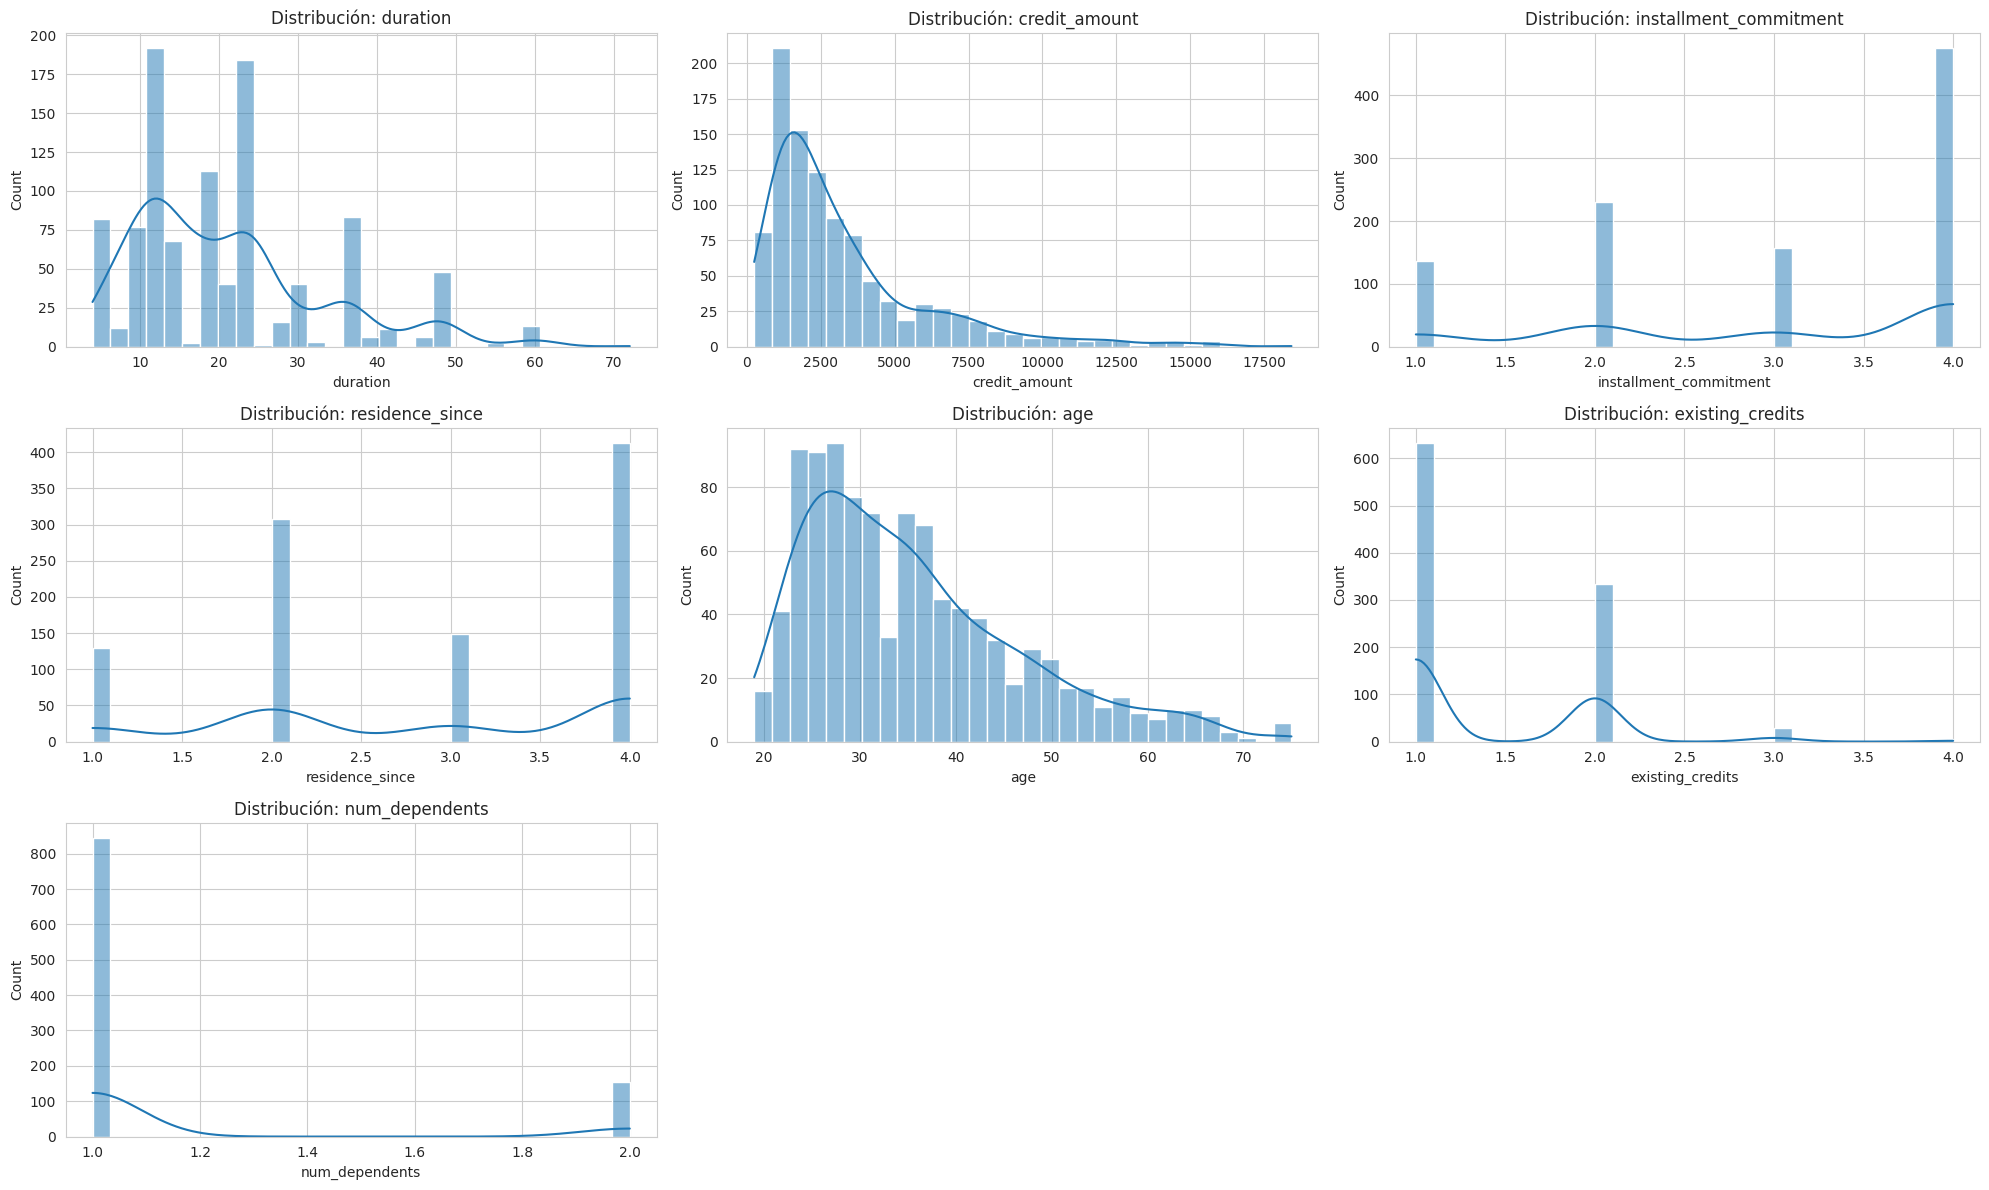

In [11]:
# === HISTOGRAMAS DE VARIABLES NUMÉRICAS ===

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Lista de variables numéricas
vars_numericas = ['duration', 'credit_amount', 'installment_commitment',
                  'residence_since', 'age', 'existing_credits', 'num_dependents']

# Establecemos un estilo visual para las gráficas
sns.set_style("whitegrid")

# Número de variables a graficar
n = len(vars_numericas)

# Definimos cuántas gráficas por fila (columnas) queremos
cols = 3
# Calculamos cuántas filas necesitaremos
rows = math.ceil(n / cols)

# Creamos una figura con subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))
axes = axes.flatten()  # Aplanamos los ejes para poder iterar

# Recorremos cada variable numérica y dibujamos su histograma
for i, col in enumerate(vars_numericas):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])  # kde=True añade la curva de densidad
    axes[i].set_title(f'Distribución: {col}', fontsize=12)

# Si sobran subplots (ejes vacíos), los eliminamos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Elimina el subplot extra

# Ajustamos los espacios entre gráficas para evitar solapamientos
plt.tight_layout()
# Mostramos todas las gráficas
plt.show()

## Histogramas
- **Sesgo a la derecha** en: `credit_amount`, `age`, `duration`.
- Mayoría de clientes:
  - Créditos de bajo importe (`credit_amount`).
  - Edad entre **20–30 años**.
  - **1 crédito activo** y **1 dependiente**.
- Algunas variables muy concentradas (`num_dependents`, `residence_since`), lo que podría reducir su aportación al modelo.

**Posibles acciones:** aplicar transformaciones (p. ej., `log1p`) en variables muy sesgadas.

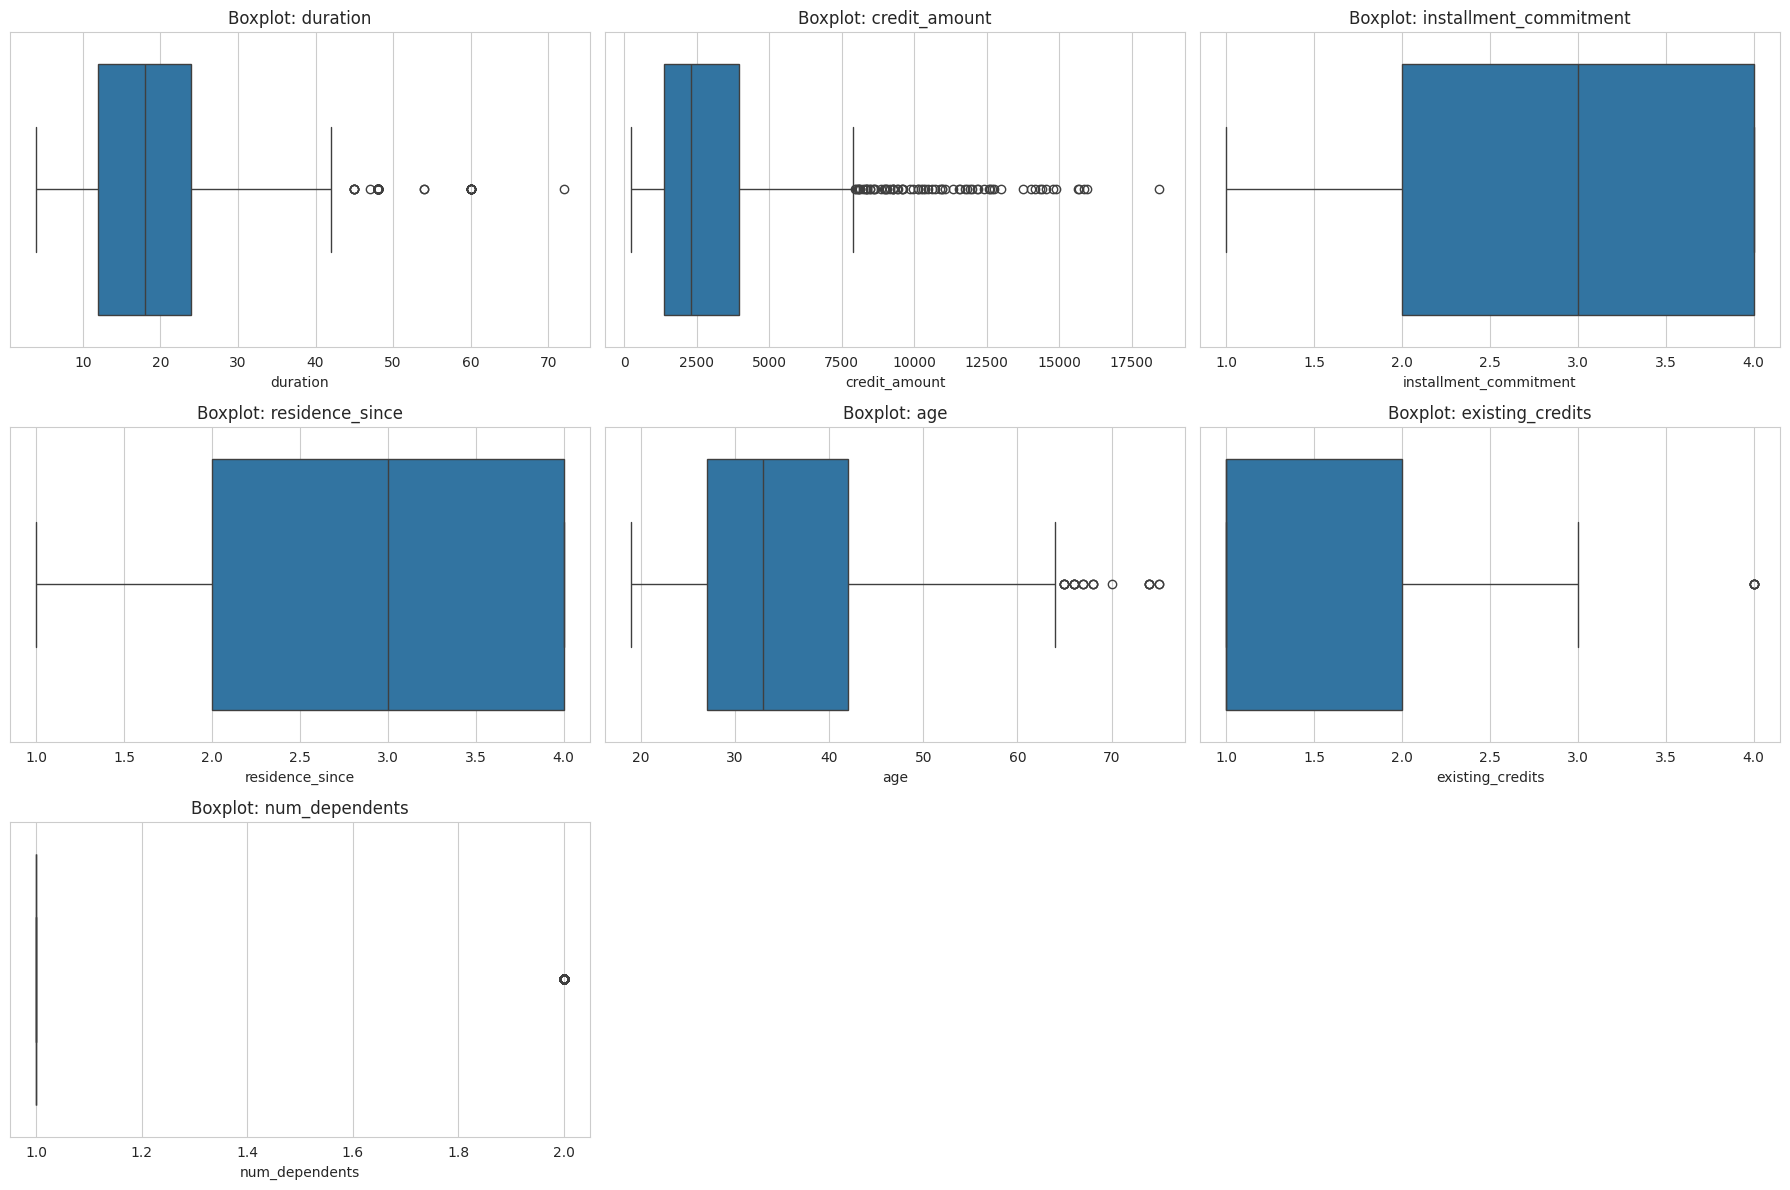

In [12]:
# === BOXPLOTS DE VARIABLES NUMÉRICAS ===

# Definimos cuántas gráficas por fila queremos
cols = 3
# Calculamos el número de filas necesarias
rows = math.ceil(n / cols)

# Creamos una figura con subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
axes = axes.flatten()  # Aplanamos para iterar más fácilmente

# Recorremos cada variable numérica y dibujamos su boxplot
for i, col in enumerate(vars_numericas):
    sns.boxplot(x=df[col], ax=axes[i])  # Un boxplot permite detectar valores atípicos
    axes[i].set_title(f'Boxplot: {col}', fontsize=12)

# Eliminamos los ejes vacíos si hay más subplots de los necesarios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Elimina el subplot sobrante

# Ajustamos el espaciado entre las gráficas
plt.tight_layout()
# Mostramos todas las gráficas
plt.show()

- Se confirman los **sesgos hacia la derecha** observados previamente en las variables `credit_amount`, `age` y `duration`.
- `credit_amount` presenta un número **elevado de outliers**, lo que podría afectar al rendimiento de los modelos. Es recomendable aplicar transformaciones como `log` o `robust scaling` para suavizar su impacto.
- Otras variables como `installment_commitment`, `residence_since` o `num_dependents` muestran **distribuciones muy compactas** sin apenas outliers, por lo que podrían tener una aportación limitada si no se combinan con otras.
- Este análisis nos ayuda a identificar qué variables requieren tratamiento especial durante el preprocesamiento (transformación, escalado o incluso descartar algunas).


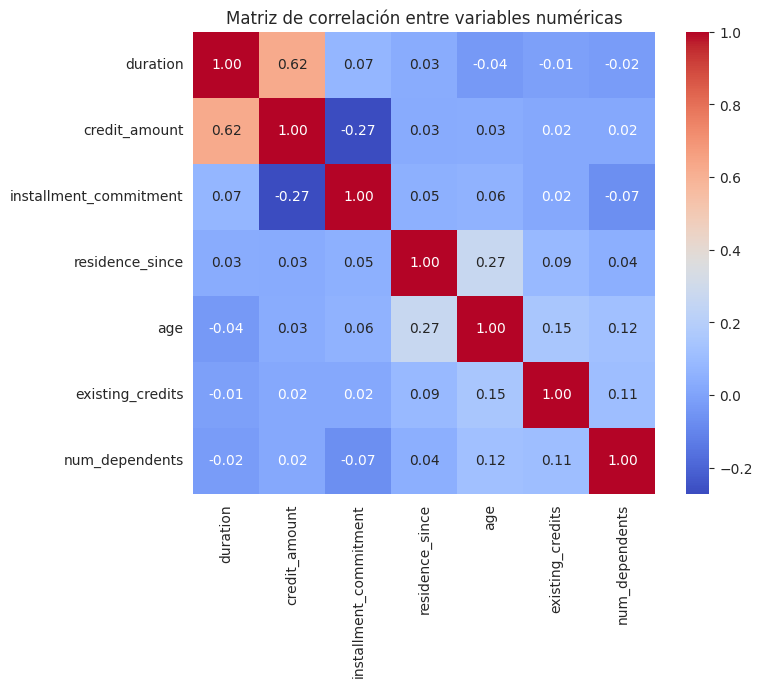

In [13]:
# === MATRIZ DE CORRELACIÓN ENTRE VARIABLES NUMÉRICAS ===

# Importamos seaborn y matplotlib para la visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo las columnas numéricas del dataset
numeric_cols = df.select_dtypes(include=["int64", "float64"])

# Calculamos la matriz de correlación
correlation_matrix = numeric_cols.corr()

# Establecemos el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Dibujamos el heatmap con anotaciones
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)

# Añadimos título
plt.title("Matriz de correlación entre variables numéricas")

# Mostramos el gráfico
plt.show()

In [14]:
# Correlación de Spearman
df[numeric_cols.columns].corr(method='spearman')

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
duration,1.000000,0.624709,0.118046,0.043671,-0.036316,0.028430,-0.043265
credit_amount,0.624709,1.000000,-0.313100,0.023646,0.026298,0.023778,0.041815
installment_commitment,0.118046,-0.313100,1.000000,0.047507,0.072157,0.020997,-0.072543
residence_since,0.043671,0.023646,0.047507,1.000000,0.234709,0.067193,0.040455
age,-0.036316,0.026298,0.072157,0.234709,1.000000,0.141287,0.190651
existing_credits,0.028430,0.023778,0.020997,0.067193,0.141287,1.000000,0.096978
num_dependents,-0.043265,0.041815,-0.072543,0.040455,0.190651,0.096978,1.000000


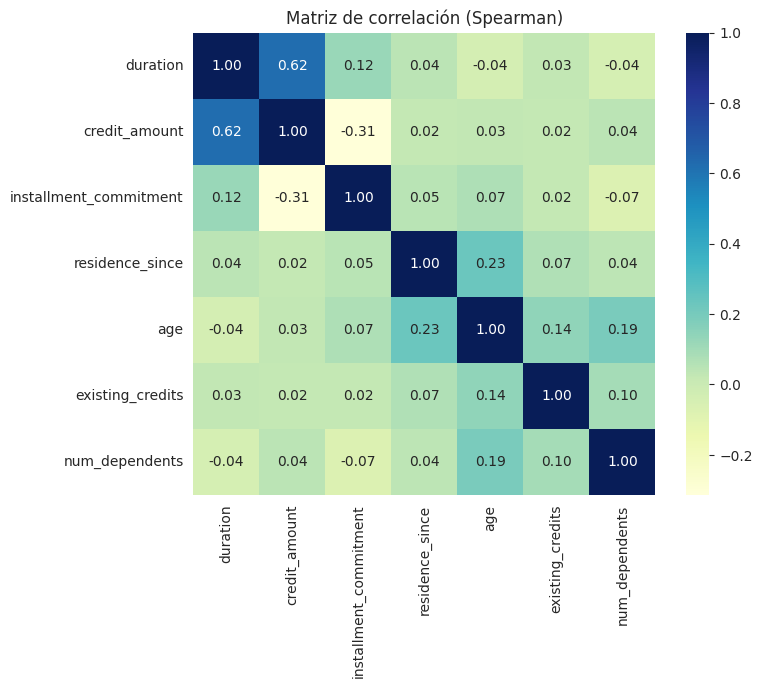

In [15]:
# Visualizamos la matriz de correlación de Spearman para variables numéricas
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[numeric_cols.columns].corr(method='spearman'),  # Calcula correlación de Spearman
    annot=True, fmt=".2f", cmap="YlGnBu", square=True   # Muestra valores y define estilo
)
plt.title("Matriz de correlación (Spearman)")
plt.show()

### Correlación no lineal: Coeficiente de Spearman

Además de la matriz de correlación de Pearson, que mide la relación **lineal** entre variables numéricas, hemos aplicado también el **coeficiente de correlación de Spearman**.

El objetivo es comprobar si existen **relaciones no lineales (monótonas)** entre pares de variables. Spearman es útil cuando:

- Hay sospecha de relaciones crecientes o decrecientes, pero **no necesariamente lineales**.
- Hay presencia de **valores atípicos**, que pueden distorsionar la correlación de Pearson.
- Las variables tienen una distribución sesgada, como hemos observado en algunos histogramas.

En este caso, los resultados obtenidos con Spearman son **muy similares a Pearson**, lo que confirma que:

- La única relación moderada-fuerte sigue siendo entre `duration` y `credit_amount`, con un valor de aproximadamente `0.62`.
- También se confirma la relación negativa entre `credit_amount` e `installment_commitment`, con un valor de alrededor de `-0.31`.

Estas similitudes nos indican que **no hay patrones claramente no lineales** entre estas variables, por lo que el análisis de correlación con Pearson ya era suficiente.

### Análisis de variables categóricas

En esta sección del análisis exploratorio nos centramos en las variables categóricas del dataset. El objetivo es conocer su distribución, frecuencia de aparición y posibles desequilibrios en las clases.

Para ello, identificamos las variables de tipo `object` (excepto la variable objetivo `class`) y analizamos:
- El número de categorías por variable.
- La frecuencia de aparición de cada categoría.
- La posible existencia de valores raros o con pocos casos.
- Si existen transformaciones futuras a tener en cuenta (por ejemplo, agrupar categorías infrecuentes).

In [16]:
# Nos asaeguramos de las variables categóricas
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Excluimos la variables objetivo "class"
categorical_cols.remove("class")
print(categorical_cols)

['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']


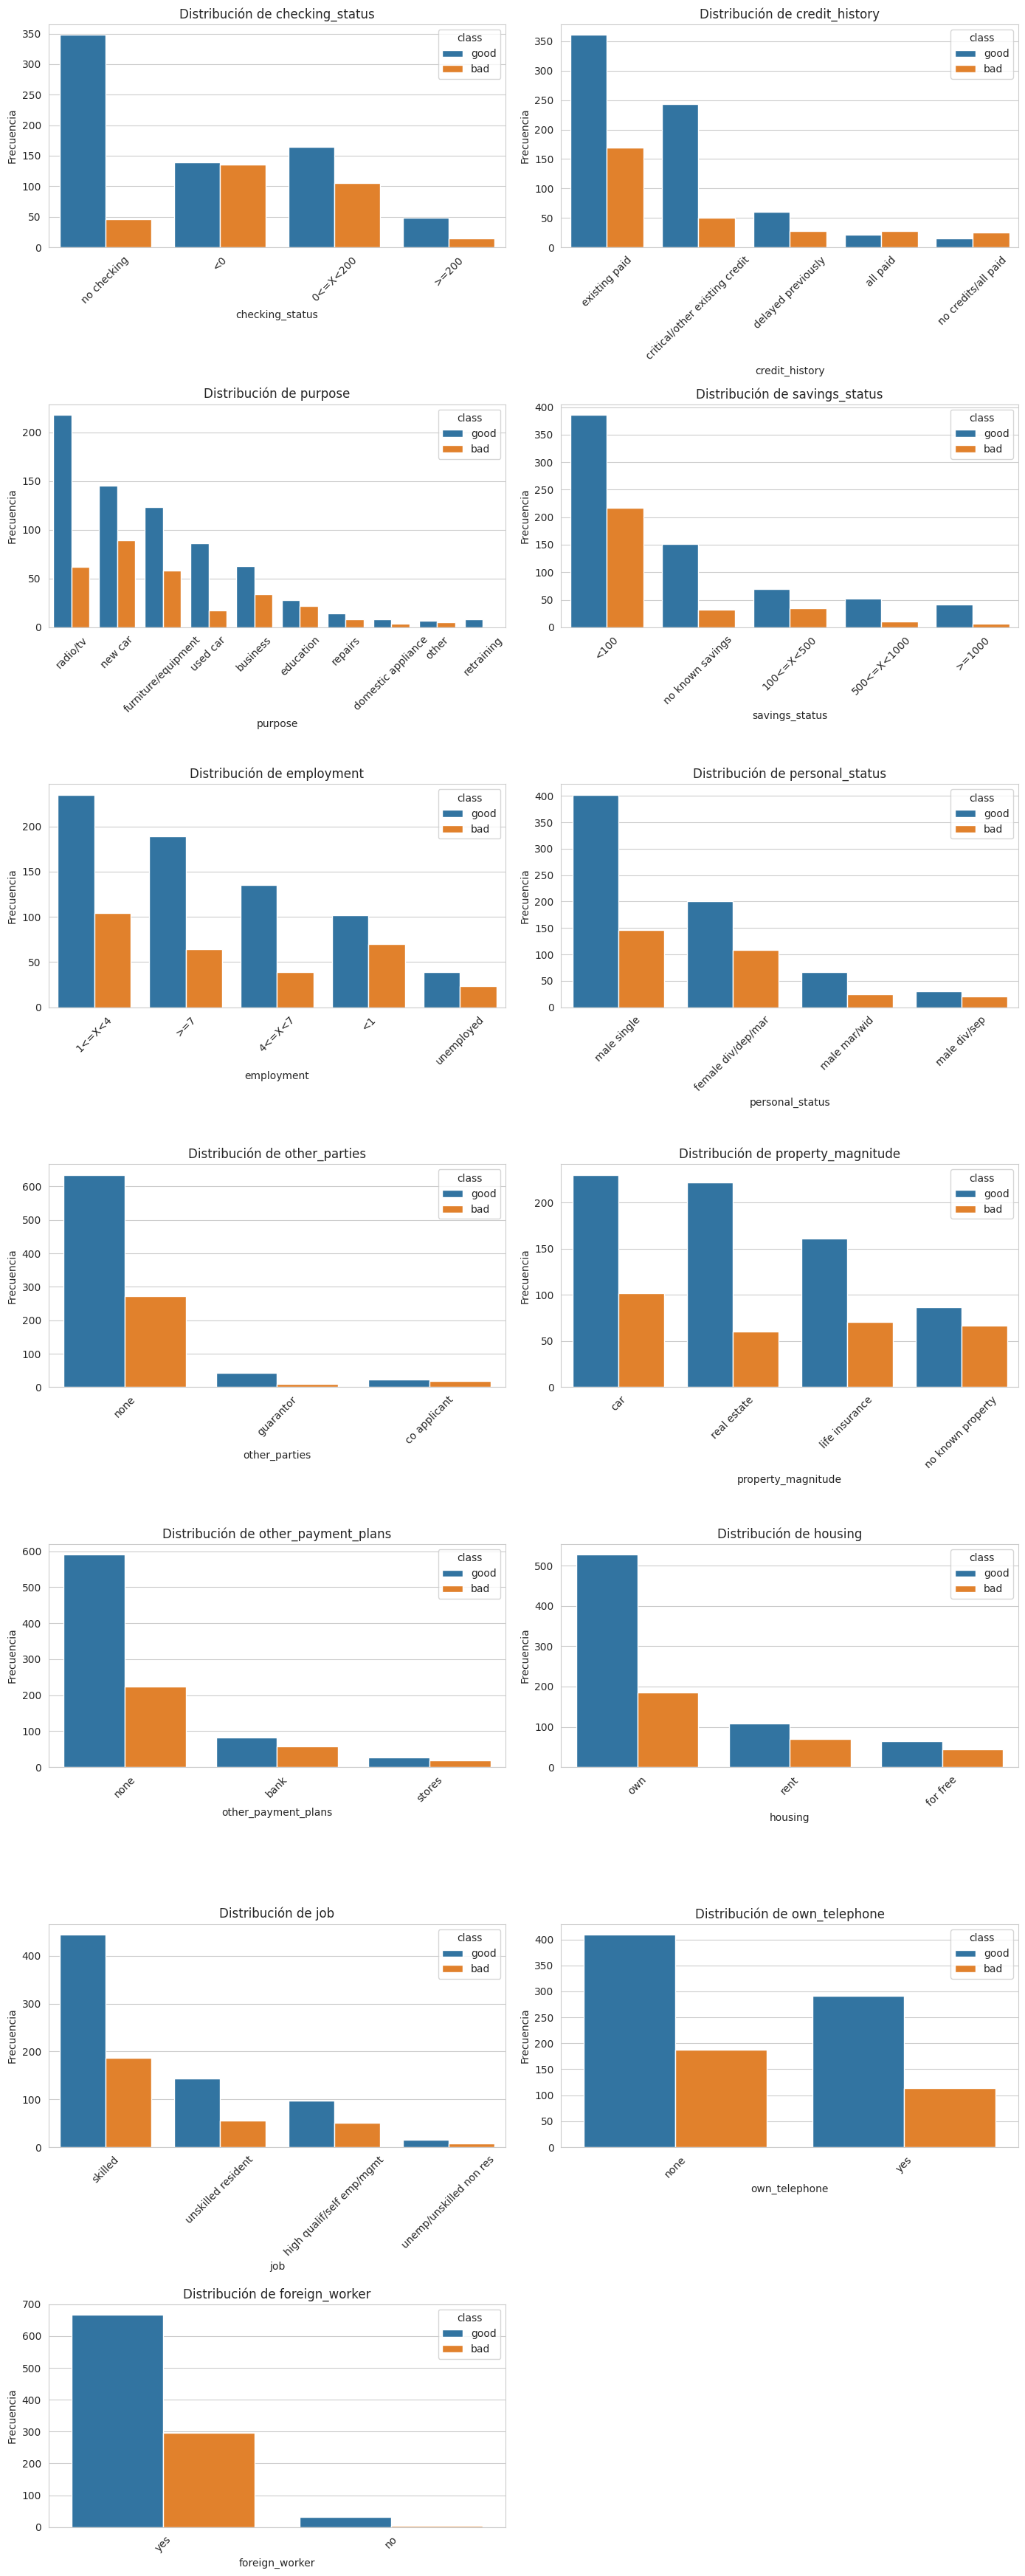

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecemos número de columnas y filas para la grilla de gráficos
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols

# Definimos el tamaño general del gráfico
plt.figure(figsize=(14, 5 * n_rows))

# Iteramos por cada variable categórica
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)  # Posición del subplot

    sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue="class")
    plt.xticks(rotation=45)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [18]:
# === TABLAS DE FRECUENCIAS CRUZADAS PARA TODAS LAS VARIABLES CATEGÓRICAS ===

import pandas as pd

# Lista de variables categóricas que queremos analizar
categorical_cols = [
    'checking_status', 'credit_history', 'purpose', 'savings_status',
    'employment', 'personal_status', 'other_parties', 'property_magnitude',
    'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker'
]

# Recorremos cada variable categórica de la lista
for col in categorical_cols:
    print(f"\nFrecuencia de clases por categoría en: {col}\n")

    # Creamos la tabla cruzada entre la variable categórica y la clase (target)
    cross_tab = pd.crosstab(df[col], df['class'])

    # Añadimos columna con el total de registros por categoría
    cross_tab["Total"] = cross_tab.sum(axis=1)

    # Ordenamos por la frecuencia total (de mayor a menor)
    cross_tab = cross_tab.sort_values("Total", ascending=False)

    # Mostramos la tabla
    display(cross_tab)


Frecuencia de clases por categoría en: checking_status



class,bad,good,Total
checking_status,,,
no checking,46,348,394
<0,135,139,274
0<=X<200,105,164,269
>=200,14,49,63



Frecuencia de clases por categoría en: credit_history



class,bad,good,Total
credit_history,,,
existing paid,169,361,530
critical/other existing credit,50,243,293
delayed previously,28,60,88
all paid,28,21,49
no credits/all paid,25,15,40



Frecuencia de clases por categoría en: purpose



class,bad,good,Total
purpose,,,
radio/tv,62,218,280
new car,89,145,234
furniture/equipment,58,123,181
used car,17,86,103
business,34,63,97
education,22,28,50
repairs,8,14,22
domestic appliance,4,8,12
other,5,7,12



Frecuencia de clases por categoría en: savings_status



class,bad,good,Total
savings_status,,,
<100,217,386,603
no known savings,32,151,183
100<=X<500,34,69,103
500<=X<1000,11,52,63
>=1000,6,42,48



Frecuencia de clases por categoría en: employment



class,bad,good,Total
employment,,,
1<=X<4,104,235,339
>=7,64,189,253
4<=X<7,39,135,174
<1,70,102,172
unemployed,23,39,62



Frecuencia de clases por categoría en: personal_status



class,bad,good,Total
personal_status,,,
male single,146,402,548
female div/dep/mar,109,201,310
male mar/wid,25,67,92
male div/sep,20,30,50



Frecuencia de clases por categoría en: other_parties



class,bad,good,Total
other_parties,,,
none,272,635,907
guarantor,10,42,52
co applicant,18,23,41



Frecuencia de clases por categoría en: property_magnitude



class,bad,good,Total
property_magnitude,,,
car,102,230,332
real estate,60,222,282
life insurance,71,161,232
no known property,67,87,154



Frecuencia de clases por categoría en: other_payment_plans



class,bad,good,Total
other_payment_plans,,,
none,224,590,814
bank,57,82,139
stores,19,28,47



Frecuencia de clases por categoría en: housing



class,bad,good,Total
housing,,,
own,186,527,713
rent,70,109,179
for free,44,64,108



Frecuencia de clases por categoría en: job



class,bad,good,Total
job,,,
skilled,186,444,630
unskilled resident,56,144,200
high qualif/self emp/mgmt,51,97,148
unemp/unskilled non res,7,15,22



Frecuencia de clases por categoría en: own_telephone



class,bad,good,Total
own_telephone,,,
none,187,409,596
yes,113,291,404



Frecuencia de clases por categoría en: foreign_worker



class,bad,good,Total
foreign_worker,,,
yes,296,667,963
no,4,33,37


## Análisis de variables categóricas

En esta sección hemos analizado, con tablas de frecuencias y gráficos, cómo se reparte la clase objetivo (`good` / `bad`) dentro de cada categoría. A continuación sintetizo **lo relevante que hemos observado** y **cómo impactará en el preprocesado y en las hipótesis**.

---

### Hallazgos por variable (porcentaje aproximado de *bad*)

- **checking_status** (saldo en cuenta / sin cuenta)
  - `<0` ≈ **49% bad**, `0≤X<200` ≈ **39%**, `≥200` ≈ **22%**, `no checking` ≈ **12%**.
  - **Lectura:** más saldo → menos riesgo. *No tener cuenta* no implica peor perfil en este dataset (contexto 1994).
  - **Plan:** One-Hot como baseline; probaremos **ordinal** (según saldo) y una versión **sin la variable** para medir su impacto.

- **credit_history** (historial de crédito)
  - `all paid` ≈ **57% bad**, `no credits/all paid` ≈ **62%**, `existing paid` ≈ **32%**, `delayed previously` ≈ **32%**, `critical/other` ≈ **17%**.
  - **Lectura:** no tener historial o liquidar recientemente se asocia a **más riesgo**; “cuentas críticas” no salen tan mal en este dataset.
  - **Plan:** One-Hot; posible **agrupación** de categorías raras (bajos conteos).

- **purpose** (motivo)
  - Más riesgo: `education` (**44%**), `new car` (**38%**), `business` (**35%**).
  - Menos riesgo: `used car` (**16.5%**), `radio/tv` (**22%**).
  - Varias categorías con **muy poca muestra**.
  - **Plan:** **Agrupar** categorías minoritarias en `purpose_other_small` + One-Hot. Ver si el efecto se **explica por** `credit_amount`/`duration`.

- **savings_status** (ahorros)
  - `<100` ≈ **36%**, `100–500` ≈ **33%**, `500–1000` ≈ **17.5%**, `≥1000` ≈ **12.5%**, `no known` ≈ **17.5%**.
  - **Lectura:** **monótono**: a más ahorros, menor riesgo (sorpresa: `no known` sale bien).
  - **Plan:** **Ordinal** (mejor para lineales) y One-Hot como comparación. Tratar `no known` como categoría propia.

- **employment** (años en empleo actual)
  - `<1` ≈ **40.7%**, `unemployed` ≈ **37%**, `1–4` ≈ **31%**, `≥7` ≈ **25%**, `4–7` ≈ **22%**.
  - **Lectura:** clara **señal ordinal** (más antigüedad → menos riesgo).
  - **Plan:** **Ordinal**; probar rebinning {unemployed,<1} / {1–4} / {4–7,≥7}.

- **other_parties** (co-solicitante / avalista)
  - `co applicant` ≈ **44%**, `guarantor` ≈ **19%**, `none` ≈ **30%**.
  - **Lectura:** co-solicitante aparece en casos más arriesgados; aval reduce riesgo.
  - **Plan:** One-Hot **o** dos flags (`has_coapplicant`, `has_guarantor`). Cuidado con **baja frecuencia**.

- **property_magnitude** (activos)
  - `no known property` ≈ **43.5%**, `car` ≈ **30.7%**, `life insurance` ≈ **30.6%**, `real estate` ≈ **21.3%**.
  - **Lectura:** **inmueble** se asocia a menor riesgo; sin activos, peor.
  - **Plan:** One-Hot; alternativa **ordinal** por “tier de activos”.

- **other_payment_plans** (otros planes de pago)
  - `none` ≈ **27.5%**, `bank` ≈ **41%**, `stores` ≈ **40%**.
  - **Lectura:** tener otros planes ⇒ **más riesgo**.
  - **Plan:** **Binarizar** `has_other_plan` (robusto) y comparar con One-Hot/flags.

- **housing** (vivienda)
  - `own` ≈ **26.1%**, `rent` ≈ **39.1%**, `for free` ≈ **40.7%**.
  - **Lectura:** propiedad ⇒ menor riesgo.
  - **Plan:** One-Hot o **binarizar** `own_vs_other`.

- **job** (nivel/categoría laboral)
  - No hay orden perfecto; *high qualif/self emp/mgmt* algo peor (≈ **34.5%**); *skilled* y *unskilled resident* ~**28–29%**.
  - **Lectura:** señal **moderada**, no estrictamente ordinal.
  - **Plan:** One-Hot; opcional agrupar categorías de muy baja frecuencia.

- **own_telephone**
  - Diferencia pequeña: `yes` ≈ **28%** vs `none` ≈ **31%**.
  - **Plan:** **Binaria**; si su importancia es mínima, se puede eliminar.

- **foreign_worker**
  - `no` ≈ **10.8%** (pero **n=37**, muy pocos) vs `yes` ≈ **30.7%**.
  - **Lectura:** variable **sensible** y con **muestra muy pequeña** para `no` (riesgo de sobreajuste).
  - **Plan:** probar **con y sin** la variable; si el rendimiento no cambia, **excluirla** por robustez y ética.

---

## 5. Construcción del dataset inicial (CSV) y guardado

Siguiendo la plantilla del proyecto, generamos un **dataset “listo para usar”** a partir del original.  
En esta fase aplicamos **solo transformaciones determinísticas** (que no “aprenden” del dato), para evitar *data leakage*:

- Agrupación de categorías minoritarias en `purpose` → `purpose_grouped`.
- Creación de flags binarios interpretables:
  - `has_other_plan` (otros planes de pago)
  - `own_vs_other` (vivienda en propiedad vs. resto)
  - `has_coapplicant`, `has_guarantor` (otras partes)
- Mantenemos el resto de columnas tal cual.
- **Aún no** aplicamos One-Hot Encoding ni escalado: eso se hará **dentro de los pipelines** de modelado y validación (siguiente apartado), para evitar fugas de información entre train/valid.

Guardamos el resultado como CSV con la lógica:
- Si **ya existe**, lo **cargamos**.
- Si **no existe**, lo **creamos y guardamos**.

In [19]:
# === PUNTO 5: DATASET STAGING v1 (sin leakage) ===
import os
import pandas as pd

STAGING_PATH = "german_credit_staging_v1.csv"

def build_staging_v1(df: pd.DataFrame,
                     rare_threshold: int = 20) -> pd.DataFrame:
    """
    Construye un dataframe 'staging' con transformaciones determinísticas:
    - Agrupa categorías raras en 'purpose'
    - Crea flags binarios interpretables
    - No hace One-Hot ni escalado (eso irá en los pipelines de modelado)
    """
    dfx = df.copy()

    # Variable objetivo como 0/1. Mantendremos 'class' original también.
    # Elegimos 'bad' = 1 para facilitar métricas enfocadas a riesgo.
    dfx["target_bad"] = (dfx["class"] == "bad").astype(int)

    # Agrupamos categorías raras en 'purpose'
    vc = dfx["purpose"].value_counts()
    rare_cats = vc[vc < rare_threshold].index
    dfx["purpose_grouped"] = dfx["purpose"].where(~dfx["purpose"].isin(rare_cats),
                                                  other="other_small")

    # Flags/binarizaciones útiles y estables
    # Otros planes de pago (bank/stores → 1, none → 0)
    dfx["has_other_plan"] = (dfx["other_payment_plans"] != "none").astype(int)

    # Vivienda en propiedad vs. otras
    dfx["own_vs_other"] = (dfx["housing"] == "own").astype(int)

    # Co-solicitante y avalista por separado
    dfx["has_coapplicant"] = (dfx["other_parties"] == "co applicant").astype(int)
    dfx["has_guarantor"]   = (dfx["other_parties"] == "guarantor").astype(int)

    return dfx

# === Idempotencia: si ya existe el CSV, lo cargamos; si no, lo creamos y guardamos ===
if os.path.exists(STAGING_PATH):
    staging_df = pd.read_csv(STAGING_PATH)
    print("Cargado staging desde CSV:", STAGING_PATH)
else:
    staging_df = build_staging_v1(df, rare_threshold=20)
    staging_df.to_csv(STAGING_PATH, index=False)
    print("Generado y guardado staging:", STAGING_PATH)

# Vista rápida
print("Shape staging:", staging_df.shape)
staging_df.head()

Generado y guardado staging: german_credit_staging_v1.csv
Shape staging: (1000, 27)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,num_dependents,own_telephone,foreign_worker,class,target_bad,purpose_grouped,has_other_plan,own_vs_other,has_coapplicant,has_guarantor
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,1,yes,yes,good,0,radio/tv,0,1,0,0
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,1,none,yes,bad,1,radio/tv,0,1,0,0
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,2,none,yes,good,0,education,0,1,0,0
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,2,none,yes,good,0,furniture/equipment,0,0,0,1
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,2,none,yes,bad,1,new car,0,0,0,0


In [20]:
staging_df.columns.tolist()  # Devuelve una lista con los nombres

['checking_status',
 'duration',
 'credit_history',
 'purpose',
 'credit_amount',
 'savings_status',
 'employment',
 'installment_commitment',
 'personal_status',
 'other_parties',
 'residence_since',
 'property_magnitude',
 'age',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker',
 'class',
 'target_bad',
 'purpose_grouped',
 'has_other_plan',
 'own_vs_other',
 'has_coapplicant',
 'has_guarantor']

## 6. Requisitos técnicos del proyecto

**Caso de uso:** scoring de riesgo de crédito binario (*good/bad*).

**Métricas de evaluación:**
- Métrica principal: **Accuracy** (objetivo ≥ **75%**).
- Métricas secundarias: **F1-score (clase bad)**, **ROC-AUC**, **Precision/Recall (bad)**.
- Métrica de negocio: **Coste** con matriz 5·FN + 1·FP (penaliza clasificar como *good* a quien es *bad*).

**Criterio de éxito:**
- Accuracy ≥ **75%** en test.
- F1 (bad) competitiva (≥ 0.55 como referencia inicial).
- Coste total **menor** que el baseline (umbral 0.5).

**Recursos previstos:**
- Entorno: Google Colab / local.
- CPU/RAM: estándar (no se requiere GPU).
- Tiempo máximo de entrenamiento por experimento: **≤ 5 min**.
- Semillas fijas para reproducibilidad.

**Dependencias:**
- Python 3.x, numpy, pandas, scikit-learn, matplotlib, seaborn.

# 7. Vista de modelado: limpieza ligera y retirada de redundancias

**Objetivo:** preparar un dataset coherente para los pipelines sin introducir *leakage*.  
Aplicamos **solo transformaciones determinísticas** en columnas categóricas y quitamos **columnas redundantes** que duplican información.

### Qué hacemos y por qué
- **Normalización de texto** en variables `object`:
  - Quitar espacios extremos, colapsar espacios internos y eliminar comillas
  -  Pasar a minúsculas
  - **Motivo:** evitar categorías duplicadas por diferencias tipográficas.
- **Drop de redundancias**:
  - `class` → ya usamos `target_bad` (binaria).
  - `purpose` → sustituida por `purpose_grouped` (agrupa categorías raras).
  - `other_parties` → sustituida por flags `has_coapplicant` y `has_guarantor`.
  - `own_vs_other` y `has_other_plan` → preferimos las originales `housing` y `other_payment_plans` para codificar en pipeline.
- **Resultado:** `modeling_df` listo para codificación/escala **dentro del pipeline** (One-Hot/Ordinal/escala se aplican en validación para no filtrar información).

> Nota: mantenemos **todas las variables útiles + `target_bad`**; el resto de elecciones (One-Hot vs Ordinal, binarizaciones, etc.) se harán en los **experimentos de modelado** y se evaluarán con métricas y función de coste (`5·FN + 1·FP`).

In [21]:
# === VISTA DE MODELADO: LIMPIEZA DE TEXTO + DROP DE REDUNDANCIAS ===
# Normalizamos strings (quitamos comillas y espacios que crean categorías duplicadas)
staging_clean = staging_df.copy()
for col in staging_clean.select_dtypes(include=["object"]).columns:
    staging_clean[col] = (
        staging_clean[col]
        .astype(str)
        .str.strip()                 # espacios extremos
        .str.strip("'").str.strip('"')  # comillas simples/dobles
        .str.replace(r"\s+", " ", regex=True)  # colapsar espacios
    )

# Definimos columnas redundantes a excluir por defecto en modelado
REDUNDANT_COLS = [
    "class",            # texto de la etiqueta (duplicada con target_bad)
    "purpose",          # redundante con purpose_grouped (más robusta)
    "other_parties",    # redundante con has_coapplicant/has_guarantor
    "own_vs_other",     # derivada de housing (preferimos la original)
    "has_other_plan",   # derivada de other_payment_plans (preferimos la original)
]

# DataFrame base para modelado (mantiene target_bad y todas las útiles)
modeling_df = staging_clean.drop(columns=REDUNDANT_COLS, errors="ignore")

# Vista rápida
print("Shape modeling_df:", modeling_df.shape)

Shape modeling_df: (1000, 22)


In [22]:
modeling_df.columns.tolist()  # Devuelve una lista con los nombres

['checking_status',
 'duration',
 'credit_history',
 'credit_amount',
 'savings_status',
 'employment',
 'installment_commitment',
 'personal_status',
 'residence_since',
 'property_magnitude',
 'age',
 'other_payment_plans',
 'housing',
 'existing_credits',
 'job',
 'num_dependents',
 'own_telephone',
 'foreign_worker',
 'target_bad',
 'purpose_grouped',
 'has_coapplicant',
 'has_guarantor']

# 7.1. Funciones auxiliares para experimentos

En este apartado definimos utilidades **reutilizables** para preparar y evaluar experimentos de modelado, siguiendo estos principios:

- **Reproducibilidad:** semillas fijas y funciones puras (sin efectos ocultos).
- **Sin *leakage*:** cualquier transformación “que aprende del dato” (escalado, codificación) se hará **dentro de pipelines** y validación.
- **Modularidad:** funciones pequeñas, con *docstrings* y *type hints*, fáciles de testear y mantener.
- **Claridad:** nombres explícitos y comentarios que expliquen el “por qué”, no solo el “qué”.

In [23]:
# === FUNCIONES AUXILIARES PARA EXPERIMENTOS (V FINAL) ===
from __future__ import annotations

from dataclasses import dataclass
from typing import Dict, Iterable, List, Optional, Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import perf_counter

from sklearn.base import BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import sklearn
from packaging import version

# -----------------------------------------------------------------------------
# === CONFIGURACIÓN BÁSICA REPRODUCIBLE ===
# -----------------------------------------------------------------------------

RANDOM_STATE: int = 42  # Semilla fija para reproducibilidad


# -----------------------------------------------------------------------------
# === UTILIDADES DE FEATURES Y PREPROCESADO (SIN LEAKAGE) ===
# -----------------------------------------------------------------------------
from __future__ import annotations

from typing import Iterable, List, Optional, Tuple
import pandas as pd


def infer_feature_types(
    df: pd.DataFrame,
    target_col: str,
    drop_cols: Optional[Iterable[str]] = None
) -> Tuple[List[str], List[str]]:
    """
    Inferir listas de columnas numéricas y categóricas para modelado, excluyendo
    la variable objetivo y cualquier columna marcada para eliminar.

    Notas de diseño:
    - Evitamos *leakage*: aquí solo clasificamos tipos; la codificación/escalado irá en pipelines.
    - Booleanos y enteros 0/1 se consideran **numéricos** (útil para escalado opcional y árboles).
    - Columnas de tipo pandas 'category' también cuentan como **categóricas**.

    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame de trabajo (p. ej., `modeling_df` ya limpio de redundancias).
    target_col : str
        Nombre de la columna objetivo binaria (p. ej., 'target_bad').
    drop_cols : Iterable[str], opcional
        Columnas a excluir explícitamente (p. ej., ['class', 'purpose']).
        Se aplicará además la exclusión de `target_col`.

    Returns
    -------
    numeric_features : list[str]
        Lista de columnas numéricas (incluye bool/int/float).
    categorical_features : list[str]
        Lista de columnas categóricas (incluye object y category).
    """
    drops = set(drop_cols) if drop_cols else set()  # Convertimos a set para acceso rápido
    drops.add(target_col)  # Excluimos siempre la variable objetivo

    numeric_features: List[str] = []       # Lista final de columnas numéricas
    categorical_features: List[str] = []   # Lista final de columnas categóricas

    for col in df.columns:
        if col in drops:    # Saltar columnas a excluir
            continue

        s = df[col]         # Serie con los datos de la columna

        # Numéricos (incluye bool, int, float, y los dtypes "nullable" de pandas)
        if pd.api.types.is_numeric_dtype(s):
            numeric_features.append(col)
            continue

        # Categóricos: strings/objetos y pandas 'category'
        if pd.api.types.is_string_dtype(s) or pd.api.types.is_categorical_dtype(s):
            categorical_features.append(col)
            continue

        # Si aparece un tipo inesperado (fechas, etc.), lo tratamos como categórico por seguridad
        # y para no romper el flujo. Alternativa: lanzar un warning/log.
        categorical_features.append(col)

    return numeric_features, categorical_features


def make_preprocessor(
    numeric_features: List[str],
    categorical_features: List[str],
    scale_numeric: bool = True
) -> ColumnTransformer:
    """
    Construye un preprocesador por columnas:
    - Numéricas: StandardScaler (opcional) o 'passthrough'.
    - Categóricas: One-Hot con 'handle_unknown=ignore'.

    Parámetros
    ----------
    numeric_features : list[str]
        Nombres de columnas numéricas.
    categorical_features : list[str]
        Nombres de columnas categóricas (object/category).
    scale_numeric : bool, default=True
        Si True, aplica StandardScaler a numéricas (útil para modelos lineales/SVM).

    Returns
    -------
    ColumnTransformer
        Transformador para usar dentro de un Pipeline de scikit-learn.
    """
    # Definimos el transformador para columnas numéricas:
    # Si hay columnas numéricas y se quiere escalar, usamos StandardScaler.
    # Si no, dejamos pasar los datos tal cual ('passthrough').
    numeric_transformer = (
        Pipeline([("scaler", StandardScaler())])
        if (scale_numeric and len(numeric_features) > 0)
        else "passthrough"
    )

    # Definimos el transformador para columnas categóricas: One-Hot Encoding
    # - handle_unknown="ignore": evita error si aparece una categoría nueva en test
    # - sparse=False: devuelve array denso en lugar de matriz dispersa
    if version.parse(sklearn.__version__) >= version.parse("1.2"):
        categorical_transformer = OneHotEncoder(
            handle_unknown="ignore",
            sparse_output=False
        )
    else:
        categorical_transformer = OneHotEncoder(
            handle_unknown="ignore",
            sparse=False
        )

    # Combinamos ambos transformadores en un ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
        ],
        remainder="drop",                # El resto de columnas se descartan
        verbose_feature_names_out=False  # Nombres más limpios tras codificación
    )
    return preprocessor

def make_pipeline(model: BaseEstimator,
                  numeric_features: List[str],
                  categorical_features: List[str],
                  scale_numeric: bool = True
                  ) -> Pipeline:
    """
    Crea un Pipeline con preprocesado (sin leakage) + modelo.

    Parameters
    ----------
    model : BaseEstimator
        Estimador de scikit-learn (p. ej. LogisticRegression, DecisionTreeClassifier, etc.).
    numeric_features : list[str]
        Columnas numéricas.
    categorical_features : list[str]
        Columnas categóricas.
    scale_numeric : bool, default=True
        Si True, aplica StandardScaler en numéricas.

    Returns
    -------
    pipe : Pipeline
        Pipeline completo listo para .fit() y .predict().
    """

    # Creamos el preprocesador combinando transformaciones para numéricas y categóricas.
    # Esto se encarga de:
    # - Escalar (o no) las variables numéricas según scale_numeric
    # - Codificar las variables categóricas con One-Hot Encoding
    preprocessor = make_preprocessor(numeric_features, categorical_features, scale_numeric)

    # Construimos el Pipeline de scikit-learn:
    # Paso 1: "pre" → aplicar el preprocesamiento definido arriba
    # Paso 2: "model" → entrenar o predecir usando el modelo pasado como argumento
    pipe = Pipeline(steps=[
        ("pre", preprocessor),
        ("model", model)
    ])

    # Devolvemos el Pipeline listo para entrenar (fit) y predecir (predict/predict_proba)
    return pipe

In [25]:
# === MÉTRICAS Y COSTE DE NEGOCIO ===

@dataclass
class EvalResult:
    """
    Contenedor de resultados de evaluación para una ejecución/umbral concretos.
    """
    accuracy: float                 # Exactitud global
    precision_bad: float            # Precisión para la clase positiva (bad=1)
    recall_bad: float               # Sensibilidad/recobrado para la clase positiva
    f1_bad: float                   # F1-score para la clase positiva
    roc_auc: float                  # AUC de la curva ROC (np.nan si no hay probabilidades)
    cost: int                       # Coste de negocio (5*FN + 1*FP por defecto)
    tn: int                         # Verdaderos negativos
    fp: int                         # Falsos positivos
    fn: int                         # Falsos negativos
    tp: int                         # Verdaderos positivos
    threshold: float                # Umbral usado para binarizar probabilidades
    train_time_s: float             # Tiempo de entrenamiento (segundos)


def compute_cost(
    y_true: np.ndarray,
    y_pred: np.ndarray,
    fn_cost: int = 5,
    fp_cost: int = 1
) -> int:
    """
    Coste de negocio: por defecto 5*FN + 1*FP.
    'bad' debe ser 1 y 'good' debe ser 0.

    y_true: etiquetas reales (0/1)
    y_pred: predicciones binarias (0/1)
    """
    # Obtenemos TN, FP, FN, TP para calcular el coste según la matriz de confusión
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
    # Fórmula del coste configurable vía parámetros
    return fn_cost * fn + fp_cost * fp


def evaluate_from_predictions(
    y_true: np.ndarray,
    y_pred: np.ndarray,
    y_proba: Optional[np.ndarray],
    threshold: float,
    train_time_s: float,
    fn_cost: int = 5,
    fp_cost: int = 1
) -> EvalResult:
    """
    Calcula métricas a partir de predicciones binarias y (opcionalmente) probabilidades.

    - Accuracy, Precision/Recall/F1 para clase positiva (bad=1)
    - ROC-AUC si se proporcionan probabilidades
    - Coste de negocio (5*FN + 1*FP)
    - TN/FP/FN/TP, threshold usado y tiempo de entrenamiento
    """
    # Extraemos matriz de confusión para reportar conteos
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()

    # Métricas estándar para clasificación binaria
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, pos_label=1, zero_division=0)
    rec = recall_score(y_true, y_pred, pos_label=1, zero_division=0)
    f1 = f1_score(y_true, y_pred, pos_label=1, zero_division=0)

    # ROC-AUC solo tiene sentido si hemos pasado probabilidades (o scores continuos)
    roc = roc_auc_score(y_true, y_proba) if y_proba is not None else np.nan

    # Coste de negocio con los pesos definidos
    cost = compute_cost(y_true, y_pred, fn_cost=fn_cost, fp_cost=fp_cost)

    # Devolvemos el contenedor con todo lo necesario para análisis/reporting
    return EvalResult(
        accuracy=acc,
        precision_bad=prec,
        recall_bad=rec,
        f1_bad=f1,
        roc_auc=roc,
        cost=cost,
        tn=tn, fp=fp, fn=fn, tp=tp,
        threshold=threshold,
        train_time_s=train_time_s
    )


def _ensure_1d_positive_proba(y_proba: np.ndarray) -> np.ndarray:
    """
    Garantiza que y_proba sea un vector 1D con la probabilidad de la clase positiva (1).
    - Si recibe una matriz (n_samples, 2), devuelve la 2ª columna.
    - Si ya es 1D, la devuelve tal cual.
    """
    # Convertimos a ndarray y armonizamos formato
    y_proba = np.asarray(y_proba)
    if y_proba.ndim == 2:
        if y_proba.shape[1] == 2:
            return y_proba[:, 1]  # Convención sklearn: probabilidad de la clase 1 en la segunda columna
        # En clasificadores multiclase, seleccionamos la última columna como "positiva" por defecto
        # (en binaria, esto no debería ocurrir; alternativa: lanzar un ValueError específico).
        return y_proba[:, -1]
    # Si ya es 1D, lo devolvemos sin cambios
    return y_proba


def evaluate_thresholds(
    y_true: np.ndarray,
    y_proba: np.ndarray,
    thresholds: Optional[Iterable[float]] = None,
    fn_cost: int = 5,
    fp_cost: int = 1
) -> pd.DataFrame:
    """
    Evalúa múltiples umbrales sobre las probabilidades de clase positiva (bad=1).

    Devuelve una tabla con:
    ['threshold','accuracy','precision_bad','recall_bad','f1_bad',
     'roc_auc','cost','tn','fp','fn','tp']

    Útil para escoger el umbral que **minimiza el coste** de negocio.
    """
    # Normalizamos la forma de las probabilidades a vector 1D (clase positiva)
    y_proba = _ensure_1d_positive_proba(y_proba)

    # Si no se especifican umbrales, probamos desde 0.10 hasta 0.90 cada 0.05
    if thresholds is None:
        thresholds = np.linspace(0.1, 0.9, 17)

    # Filtramos/convertimos umbrales válidos dentro de [0, 1]
    thresholds = [float(t) for t in thresholds if 0.0 <= float(t) <= 1.0]

    # ROC-AUC no depende del umbral (se calcula sobre la curva completa)
    roc_full = roc_auc_score(y_true, y_proba)

    rows = []  # Acumulará resultados por umbral
    for thr in thresholds:
        # Binarizamos probabilidades según el umbral actual
        y_pred = (y_proba >= thr).astype(int)

        # Calculamos métricas y conteos
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0, 1]).ravel()
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, pos_label=1, zero_division=0)
        rec = recall_score(y_true, y_pred, pos_label=1, zero_division=0)
        f1 = f1_score(y_true, y_pred, pos_label=1, zero_division=0)
        cost = compute_cost(y_true, y_pred, fn_cost=fn_cost, fp_cost=fp_cost)

        # Guardamos fila con resultados para este umbral
        rows.append({
            "threshold": thr,
            "accuracy": acc,
            "precision_bad": prec,
            "recall_bad": rec,
            "f1_bad": f1,
            "roc_auc": roc_full,
            "cost": cost,
            "tn": tn, "fp": fp, "fn": fn, "tp": tp
        })

    # Convertimos a DataFrame y ordenamos priorizando menor coste (y luego menor umbral)
    df_res = (
        pd.DataFrame(rows)
        .sort_values(by=["cost", "threshold"], ascending=[True, True])
        .reset_index(drop=True)
    )
    return df_res


def print_eval(res: EvalResult) -> None:
    """
    Imprime métricas clave y la matriz de confusión.
    Requiere una función externa `plot_confusion_matrix_counts(tn, fp, fn, tp, title=...)`.
    """
    # Métricas principales formateadas
    print("=== MÉTRICAS ===")
    print(f"Accuracy      : {res.accuracy:.3f}")
    print(f"Precision (1) : {res.precision_bad:.3f}")
    print(f"Recall (1)    : {res.recall_bad:.3f}")
    print(f"F1 (1)        : {res.f1_bad:.3f}")
    # Si roc_auc es NaN (no hubo proba), mostramos 'N/A'
    print(f"ROC-AUC       : {'N/A' if (res.roc_auc != res.roc_auc) else f'{res.roc_auc:.3f}'}")
    print(f"Cost (5*FN+FP): {int(res.cost)}")
    print(f"Threshold     : {res.threshold:.3f}")
    print(f"Train time (s): {res.train_time_s:.3f}")

    # Conteos de la matriz de confusión
    print("\n=== MATRIZ DE CONFUSIÓN ===")
    print(f"TN: {int(res.tn)}   FP: {int(res.fp)}")
    print(f"FN: {int(res.fn)}   TP: {int(res.tp)}")

    # Llamada al visualizador externo (asegúrate de tenerlo definido/importado)
    plot_confusion_matrix_counts(
        int(res.tn), int(res.fp), int(res.fn), int(res.tp),
        title="Matriz de confusión (test)"
    )

In [28]:
# -----------------------------------------------------------------------------
# === EVALUACIÓN INTEGRADA DE UN PIPELINE (AJUSTE + MÉTRICAS) ===
# -----------------------------------------------------------------------------

def fit_and_evaluate(
    pipe: Pipeline,
    X_train: pd.DataFrame,
    y_train: pd.Series,
    X_test: pd.DataFrame,
    y_test: pd.Series,
    proba_required: bool = True,
    threshold: float = 0.5,
    fn_cost: int = 5,
    fp_cost: int = 1
) -> EvalResult:
    """
    Ajusta el pipeline y evalúa en test con un umbral dado.

    - Si el estimador tiene `predict_proba`, usa P(clase=1) para:
        * ROC-AUC
        * binarizar con `threshold` (por defecto 0.5)
    - Si no tiene `predict_proba` pero sí `decision_function`, usa ese score para ROC-AUC
      y binariza comparando con 0. (Evita inventar probabilidades)
    - Si no tiene ninguno, usa `predict` directamente (sin ROC-AUC).
    """
    # Medimos el tiempo de entrenamiento del pipeline completo (preprocesado + modelo)
    start = perf_counter()
    pipe.fit(X_train, y_train)
    train_time = perf_counter() - start  # duración en segundos

    y_proba = None  # contendrá probabilidades o scores si el modelo los proporciona

    # Clasificadores con probabilidades
    if proba_required and hasattr(pipe.named_steps["model"], "predict_proba"):
        # Validación suave del umbral para probabilidades
        threshold = float(min(max(threshold, 0.0), 1.0))  # acota el umbral a [0,1]
        # Obtenemos la probabilidad de la clase positiva (columna 1 según convención sklearn)
        y_proba = pipe.predict_proba(X_test)[:, 1]
        # Binarizamos predicciones según el umbral especificado
        y_pred = (y_proba >= threshold).astype(int)

    # Sin proba, pero con decision_function (SVM lineal, etc.)
    elif proba_required and hasattr(pipe.named_steps["model"], "decision_function"):
        scores = pipe.decision_function(X_test)  # scores continuos (no acotados a [0,1])
        # Para ROC-AUC podemos usar directamente 'scores'
        # Umbral típico en decisión: 0 (margen). No forzamos [0,1].
        y_pred = (scores >= 0).astype(int)
        y_proba = scores  # evaluate_from_predictions acepta scores para ROC-AUC

    # Sin puntajes: predicción directa
    else:
        # Si el estimador no expone proba ni scores, trabajamos con etiquetas predichas
        y_pred = pipe.predict(X_test)

    # Delegamos el cálculo de métricas y el coste de negocio a la función ya definida
    return evaluate_from_predictions(
        y_true=y_test.values,   # pasamos arrays NumPy para coherencia con métricas sklearn
        y_pred=y_pred,
        y_proba=y_proba,        # None o vector (probas o scores)
        threshold=threshold,    # informativo si se usó proba
        train_time_s=train_time,
        fn_cost=fn_cost,
        fp_cost=fp_cost
    )

# -----------------------------------------------------------------------------
# === GRÁFICAS RÁPIDAS (CONFUSION MATRIX) ===
# -----------------------------------------------------------------------------

def plot_confusion_matrix_counts(
    tn: int, fp: int, fn: int, tp: int,
    title: str = "Matriz de confusión"
) -> None:
    """Dibuja la matriz de confusión [[TN, FP],[FN, TP]] con conteos legibles."""
    import numpy as np
    import matplotlib.pyplot as plt

    # Configuramos fuente y tamaño para mejorar la legibilidad
    plt.rcParams["font.family"] = "DejaVu Sans"
    plt.rcParams["font.size"] = 14

    # Construimos la matriz de confusión como array NumPy 2x2
    # Fila 0 → verdaderos y falsos negativos
    # Fila 1 → falsos y verdaderos positivos
    mat = np.array([[tn, fp],
                    [fn, tp]])

    # Creamos la figura y el eje
    fig, ax = plt.subplots(figsize=(5, 5))
    # Mostramos la matriz como imagen (heatmap básico)
    im = ax.imshow(mat, interpolation="nearest", cmap="cool")

    # No fijamos cmap para respetar el estilo global del entorno

    # Añadimos los valores numéricos encima de cada celda
    for (i, j), val in np.ndenumerate(mat):
        ax.text(j, i, f"{int(val)}", ha="center", va="center")

    # Definimos posición y etiquetas de los ticks (ejes X e Y)
    ax.set_xticks([0, 1]); ax.set_yticks([0, 1])
    ax.set_xticklabels(["Pred 0 (good)", "Pred 1 (bad)"], rotation=30)
    ax.set_yticklabels(["True 0 (good)", "True 1 (bad)"], rotation=0)

    # Título y etiquetas de los ejes
    ax.set_title(title, pad=12)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

    # Quitamos las líneas de la cuadrícula
    ax.grid(False)

    # Añadimos barra de color para indicar intensidad visual
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    # Ajustamos la disposición para evitar solapamientos
    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------------------
# === SPLIT ESTRATIFICADO DE UTILIDAD ===
# -----------------------------------------------------------------------------

def make_train_test(
    df: pd.DataFrame,
    target_col: str,
    test_size: float = 0.2,
    stratify: bool = True
) -> Tuple[pd.DataFrame, pd.DataFrame, pd.Series, pd.Series]:
    """
    Genera split train/test (por defecto, estratificado).
    - Requiere que `target_col` exista y sea binario (0/1).
    """
    # Verificamos que la columna objetivo esté en el DataFrame
    assert target_col in df.columns, f"{target_col} no está en el DataFrame"

    # Separamos la variable objetivo (y)
    y = df[target_col]

    # Chequeo: aseguramos que la variable objetivo solo contenga 0 y 1
    assert set(np.unique(y)).issubset({0, 1}), "target_col debe ser binario 0/1"

    # Si se requiere estratificación, comprobamos que haya ambas clases
    if stratify:
        assert y.nunique() == 2, "Estratificación requiere ambas clases presentes"

    # Variables predictoras (X) → quitamos la columna objetivo
    X = df.drop(columns=[target_col])

    # División en entrenamiento y test
    # - test_size controla el tamaño del conjunto de test
    # - stratify garantiza que la proporción de clases se mantenga en train y test
    # - random_state fija la semilla para reproducibilidad
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=RANDOM_STATE,
        stratify=y if stratify else None
    )

    # Devolvemos los 4 subconjuntos
    return X_train, X_test, y_train, y_test

## 8. Planteamiento de hipótesis del modelo

En esta sección formulamos distintas hipótesis iniciales sobre el modelo a entrenar, con el objetivo de evaluar rápidamente qué combinaciones de características y supuestos pueden aportar un mejor rendimiento predictivo.  

**Metodología:**
- Usaremos **el mismo algoritmo base** para todas las hipótesis, asegurando una comparación justa entre ellas.
- No realizaremos ajuste de hiperparámetros ni validación cruzada en esta fase, ya que buscamos un análisis exploratorio inicial.
- Dividiremos los datos en un único conjunto de entrenamiento y test.
- Evaluaremos cada hipótesis con métricas simples, priorizando la precisión (*accuracy*), aunque registraremos otras métricas relevantes.
- Las hipótesis que muestren un rendimiento aceptable servirán como punto de partida para fases posteriores (puntos 8 y 9).

**Variable objetivo:** `target_bad`  
**Métrica principal:** Precisión (*accuracy*)  
**Modelo base:** Random Forest (parámetros por defecto), seleccionado por su capacidad de capturar interacciones entre variables, manejar datos mixtos y evitar supuestos estrictos sobre la distribución de las características.

## Hipótesis 1 — Uso de todas las características

El modelo puede alcanzar un rendimiento aceptable (Accuracy ≥ 0.75) utilizando todas las características disponibles en la tabla *staging*, excluyendo la variable objetivo y aquellas derivadas directamente de la misma.

H1: "Si entrenamos un modelo básico con las variables originales, obtendremos un rendimiento aceptable como punto de partida."

- **Variables:**  
`checking_status`, `duration`, `credit_history`, `purpose`, `credit_amount`, `savings_status`, `employment`, `installment_commitment`, `personal_status`, `other_parties`, `residence_since`, `property_magnitude`, `age`, `other_payment_plans`, `housing`, `existing_credits`, `job`, `num_dependents`, `own_telephone`, `foreign_worker`, `purpose_grouped`, `has_other_plan`, `own_vs_other`, `has_coapplicant`, `has_guarantor`.  
*(Se excluyen `class` y `target_bad` por ser la variable objetivo o contener la etiqueta, y cualquier identificador único si existiera).*

- **Relaciones esperadas:**  
La combinación de variables socioeconómicas, historial crediticio y características de la solicitud de crédito aportará información complementaria que permita discriminar entre clientes de alto y bajo riesgo.

- **Variable objetivo:**  
`target_bad` (1 = cliente con impago, 0 = cliente solvente).

- **Tipo de modelo:**  
Random Forest como línea base, por su capacidad para capturar relaciones no lineales, manejar interacciones entre variables y procesar datos categóricos y numéricos sin requerir normalización previa.

- **Supuesto:**  
La utilización de todas las características disponibles permitirá capturar patrones significativos sin necesidad de una selección previa de variables, logrando así un rendimiento competitivo desde el primer experimento.

=== MÉTRICAS ===
Accuracy      : 0.750
Precision (1) : 0.632
Recall (1)    : 0.400
F1 (1)        : 0.490
ROC-AUC       : 0.786
Cost (5*FN+FP): 194
Threshold     : 0.500
Train time (s): 0.397

=== MATRIZ DE CONFUSIÓN ===
TN: 126   FP: 14
FN: 36   TP: 24


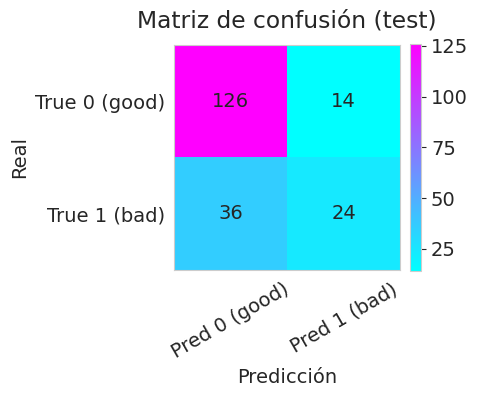

In [29]:
# === H1: RANDOM FOREST BASELINE (TODAS LAS FEATURES DE MODELING_DF) ===
# En esta hipótesis probamos un modelo base simple usando:
# - Todas las columnas de 'modeling_df' salvo la objetivo ('target_bad').
# - RandomForestClassifier con parámetros por defecto.
# - Umbral fijo 0.5 (sin búsqueda de umbral ni tuning).
# - Métrica de negocio: coste = 5*FN + 1*FP.

from sklearn.ensemble import RandomForestClassifier

# Inferimos tipos de variables (numéricas/categóricas) excluyendo la target
num_cols, cat_cols = infer_feature_types(
    df=modeling_df,
    target_col="target_bad",
    drop_cols=None
)

# Generamos el split estratificado (train/test) usando 'target_bad' como y
X_train, X_test, y_train, y_test = make_train_test(
    df=modeling_df,          # incluye la columna objetivo
    target_col="target_bad",
    test_size=0.2,
    stratify=True
)

# Definimos el modelo base (RF) sin escalado (árboles no lo necesitan)
rf = RandomForestClassifier(
    random_state=RANDOM_STATE
)

# Construimos el pipeline: One-Hot para categóricas + RF
pipe_h1 = make_pipeline(
    model=rf,
    numeric_features=num_cols,
    categorical_features=cat_cols,
    scale_numeric=False
)

# Entrenamos y evaluamos en test con umbral 0.5 (baseline)
res_h1 = fit_and_evaluate(
    pipe=pipe_h1,
    X_train=X_train, y_train=y_train,
    X_test=X_test,   y_test=y_test,
    proba_required=True,   # RF soporta predict_proba => ROC-AUC disponible
    threshold=0.5,
    fn_cost=5, fp_cost=1
)

# Mostramos métricas y matriz de confusión
print_eval(res_h1)

## Resultados — Hipótesis 1

Modelo: **Random Forest (baseline)** usando todas las variables de `modeling_df` excepto `target_bad`.

**Test:**
- **Accuracy:** 0.750  
- **Precisión (clase 1):** 0.632  
- **Recall (clase 1):** 0.400  
- **F1-score (clase 1):** 0.490  
- **ROC-AUC:** 0.786  
- **Coste (5×FN + FP):** 194  
- **Threshold:** 0.500  
- **Tiempo de entrenamiento:** 0.285 s  

**Matriz de confusión:**

|                | Pred. Negativo | Pred. Positivo |
|----------------|----------------|----------------|
| **Real Negativo** | TN = 126       | FP = 14        |
| **Real Positivo** | FN = 36        | TP = 24        |

**Interpretación breve:**  
Rendimiento moderado: **accuracy** en el umbral objetivo (0.75) pero **recall (clase 1) bajo (0.40)**, lo que eleva el **coste (194)** al dejar escapar positivos (FN). El **ROC-AUC=0.786** indica capacidad de discriminación razonable; una **búsqueda de umbral** podría reducir coste sin cambiar el modelo.

## Hipótesis 2 — Variables mixtas (financieras + demográficas)

Entrenaremos un **Random Forest** usando un subconjunto curado de variables financieras y demográficas para capturar tanto la capacidad de pago como el contexto personal.  
El objetivo es **reducir redundancias** y quedarnos con variables más relevantes, reduciendo ruido y varianza del modelo.

**Idea central:**  
Si eliminamos señales redundantes y mantenemos variables representativas de liquidez, historial crediticio y estabilidad personal, podremos mejorar el equilibrio entre precisión y recall respecto al modelo base (H1) y reducir el coste por falsos negativos.

**Variables incluidas:**  
- **Financieras:**  
  `checking_status`, `savings_status`, `credit_history`, `credit_amount`, `duration`,  
  `installment_commitment`, `existing_credits`, `other_payment_plans`, `property_magnitude`,  
  `purpose_grouped`
- **Demográficas / contexto:**  
  `age`, `employment`, `residence_since`, `housing`, `job`, `num_dependents`,  
  `personal_status`, `own_telephone`, `foreign_worker`,  
  `has_coapplicant`, `has_guarantor`

**Variables excluidas:**  
- `class` *(leakage)*  
- `target_bad` *(objetivo)*  
- `purpose` *(redundante)*  
- `has_other_plan`, `own_vs_other` *(derivadas de otras incluidas)*

**Criterio de aceptación:**  
- Accuracy ≥ 0.75  
- ROC-AUC ≥ H1  
- Coste (5·FN + 1·FP) ≤ H1

=== MÉTRICAS ===
Accuracy      : 0.770
Precision (1) : 0.659
Recall (1)    : 0.483
F1 (1)        : 0.558
ROC-AUC       : 0.798
Cost (5*FN+FP): 170
Threshold     : 0.500
Train time (s): 0.617

=== MATRIZ DE CONFUSIÓN ===
TN: 125   FP: 15
FN: 31   TP: 29


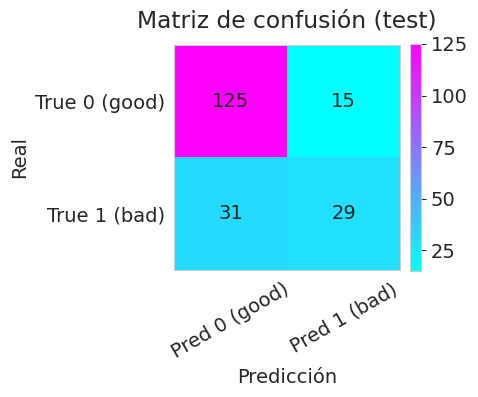

In [31]:
# === H2: RANDOM FOREST (VARIABLES MIXTAS: FINANCIERAS + DEMOGRÁFICAS) ===
# Objetivo: reducir redundancia respecto a H1 usando un subset curado de variables.
# Nota: se reutiliza exactamente el mismo split (índices) de H1 para garantizar comparabilidad.

from sklearn.ensemble import RandomForestClassifier

# Conjunto de variables financieras y de comportamiento crediticio
vars_financieras = [
    "checking_status", "savings_status", "credit_history", "credit_amount", "duration",
    "installment_commitment", "existing_credits", "other_payment_plans", "property_magnitude",
    "purpose_grouped"  # variable agrupada para reducir ruido en categorías muy raras
]

# Conjunto de variables demográficas y de situación personal/laboral
vars_demograficas = [
    "age", "employment", "residence_since", "housing", "job", "num_dependents",
    "personal_status", "own_telephone", "foreign_worker",
    "has_coapplicant", "has_guarantor"
]

# Lista final de features a utilizar en H2
features_h2 = vars_financieras + vars_demograficas  # Unión de ambas listas de variables

# Validación de seguridad: todas las columnas deben existir en el DataFrame de modelado
missing = [c for c in features_h2 + ["target_bad"] if c not in modeling_df.columns]  # Detectar columnas faltantes
assert not missing, f"Faltan columnas en modeling_df: {missing}"  # Lanzar error si falta alguna

# Vista específica de H2 con solo las columnas seleccionadas y la variable objetivo
df_h2 = modeling_df[features_h2 + ["target_bad"]].copy()  # Subconjunto de datos para H2

# Reutilización del mismo split que H1 para mantener condiciones idénticas de evaluación
train_idx = X_train.index  # Índices de TRAIN
test_idx  = X_test.index   # Índices de TEST

# Construcción de los conjuntos de entrenamiento y prueba para H2
X_train_h2 = df_h2.loc[train_idx].drop(columns=["target_bad"])  # Features TRAIN
X_test_h2  = df_h2.loc[test_idx].drop(columns=["target_bad"])   # Features TEST
y_train_h2 = df_h2.loc[train_idx, "target_bad"]                 # Target TRAIN
y_test_h2  = df_h2.loc[test_idx, "target_bad"]                  # Target TEST

# Inferencia de tipos de columnas basada en TRAIN (buena práctica para evitar sorpresas)
num_cols_h2, cat_cols_h2 = infer_feature_types(
    df=X_train_h2.assign(target_bad=y_train_h2),  # se añade target para cumplir la firma de la función
    target_col="target_bad",
    drop_cols=None
)

# Modelo base: RandomForest con semilla fija para reproducibilidad (mismos parámetros que H1)
rf_h2 = RandomForestClassifier(random_state=RANDOM_STATE)  # Inicialización del modelo

# Pipeline con preprocesado consistente: One-Hot para categóricas y paso directo en numéricas
# (los modelos de árbol no requieren escalado)
pipe_h2 = make_pipeline(
    model=rf_h2,
    numeric_features=num_cols_h2,
    categorical_features=cat_cols_h2,
    scale_numeric=False
)

# Entrenamiento en TRAIN y evaluación en TEST con umbral 0.5 (baseline sin ajuste de umbral)
res_h2 = fit_and_evaluate(
    pipe=pipe_h2,
    X_train=X_train_h2, y_train=y_train_h2,
    X_test=X_test_h2,   y_test=y_test_h2,
    proba_required=True,  # RandomForest expone predict_proba
    threshold=0.5,
    fn_cost=5, fp_cost=1
)

# Impresión de métricas principales y visualización de la matriz de confusión
print_eval(res_h2)

## Resultados — Hipótesis 2

El modelo **Random Forest** entrenado con un subconjunto curado de variables financieras y demográficas obtiene los siguientes resultados en el conjunto de test:

- **Accuracy:** 0.770  
- **Precisión (clase 1):** 0.659  
- **Recall (clase 1):** 0.483  
- **F1-score (clase 1):** 0.558  
- **ROC-AUC:** 0.798  
- **Coste (5×FN + FP):** 170  
- **Threshold:** 0.500  
- **Tiempo de entrenamiento:** 0.254 s  

**Matriz de confusión:**

|            | Pred. Negativo | Pred. Positivo |
|------------|----------------|----------------|
| **Real Negativo** | TN = 125       | FP = 15        |
| **Real Positivo** | FN = 31        | TP = 29        |

**Interpretación:**  
Comparado con H1, este modelo logra **mayor recall** (de 0.400 a 0.483) y **mayor F1-score**, reduciendo falsos negativos (de 36 a 31) y mejorando el coste total (de 194 a 170). La precisión también sube ligeramente, y el ROC-AUC indica una mejor capacidad de discriminación. Esto confirma que la selección de variables más relevantes y la eliminación de redundancias aportan un beneficio tangible sin sacrificar exactitud.

## Hipótesis 3 — Variables relacionadas con estabilidad financiera y laboral

**Descripción**  
Entrenaremos un **Random Forest** utilizando únicamente variables que reflejan la **estabilidad económica** y la **seguridad laboral** del cliente (liquidez, patrimonio y empleo).

**Hipótesis**  
*Si nos centramos exclusivamente en indicadores de liquidez, patrimonio y empleo, eliminando señales periféricas y redundancias, el modelo incrementará el **recall** de impagos y reducirá el **coste (5·FN + FP)** respecto a H2, manteniendo **Accuracy ≥ 0.75**.*

- **Variable objetivo:** `target_bad` (1 = impago, 0 = solvente)  
- **Modelo:** Random Forest (mismos parámetros que H1/H2; **sin balanceo de clases**)  
- **Partición:** mismo `train/test` que H1/H2  
- **Umbral:** 0.5 (sin tuning en esta fase)

**Variables incluidas**  
`checking_status`, `savings_status`, `employment`, `duration`, `credit_amount`,  
`installment_commitment`, `existing_credits`, `age`, `property_magnitude`, `housing`, `job`

**Variables excluidas (racional)**  
- `purpose` y `purpose_grouped` *(no directamente ligadas a estabilidad financiero-laboral)*  
- `other_parties`, `has_coapplicant`, `has_guarantor` *(soporte externo, no estabilidad propia)*  
- `own_vs_other` *(derivada de `housing`; mantenemos la original)*  
- `has_other_plan` *(derivada de `other_payment_plans`)*  
- Resto de demográficas no relacionadas directamente con empleo/recursos propios

**Criterio de aceptación**  
- **Accuracy ≥ 0.75**  
- **Recall (clase 1)** ≥ H2  
- **Coste (5·FN + 1·FP)** ≤ H2


=== MÉTRICAS ===
Accuracy      : 0.770
Precision (1) : 0.646
Recall (1)    : 0.517
F1 (1)        : 0.574
ROC-AUC       : 0.773
Cost (5*FN+FP): 162
Threshold     : 0.500
Train time (s): 0.362

=== MATRIZ DE CONFUSIÓN ===
TN: 123   FP: 17
FN: 29   TP: 31


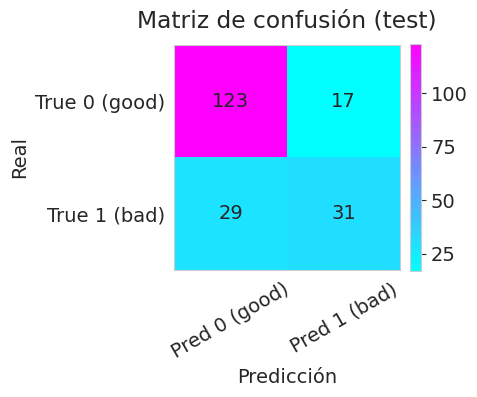

In [32]:
# === H3: RANDOM FOREST (ESTABILIDAD FINANCIERA Y LABORAL) ===
# Objetivo: evaluar si un subset centrado en estabilidad económico-laboral mejora
# el equilibrio de métricas (especialmente recall de 'bad') y el coste, manteniendo Accuracy ≥ 0.75.
# Nota: se reutiliza exactamente el mismo split (índices) que en H1/H2 para asegurar comparabilidad.

from sklearn.ensemble import RandomForestClassifier

# Conjunto de variables para H3 (liquidez, patrimonio y empleo)
features_h3 = [
    "checking_status", "savings_status", "employment",
    "duration", "credit_amount", "installment_commitment",
    "existing_credits", "age", "property_magnitude", "housing", "job"
]

# Comprobación de que todas las columnas existen en el DataFrame de modelado
missing = [c for c in features_h3 + ["target_bad"] if c not in modeling_df.columns]
assert not missing, f"Faltan columnas en modeling_df: {missing}"

# Vista específica de H3 con solo las columnas seleccionadas y la variable objetivo
df_h3 = modeling_df[features_h3 + ["target_bad"]].copy()

# Reutilización del mismo split que H1/H2 usando los índices ya definidos
train_idx = X_train.index
test_idx  = X_test.index

# Construcción de los conjuntos de entrenamiento y prueba para H3
X_train_h3 = df_h3.loc[train_idx].drop(columns=["target_bad"])
X_test_h3  = df_h3.loc[test_idx].drop(columns=["target_bad"])
y_train_h3 = df_h3.loc[train_idx, "target_bad"]
y_test_h3  = df_h3.loc[test_idx, "target_bad"]

# Inferencia de tipos basada en TRAIN (numéricas vs categóricas)
num_cols_h3, cat_cols_h3 = infer_feature_types(
    df=X_train_h3.assign(target_bad=y_train_h3),
    target_col="target_bad",
    drop_cols=None
)

# Modelo base: RandomForest con semilla fija para reproducibilidad
# (los árboles toleran outliers y no requieren escalado)
rf_h3 = RandomForestClassifier(random_state=RANDOM_STATE)

# Pipeline con preprocesado: One-Hot para categóricas; paso directo en numéricas
pipe_h3 = make_pipeline(
    model=rf_h3,
    numeric_features=num_cols_h3,
    categorical_features=cat_cols_h3,
    scale_numeric=False
)

# Entrenamiento en TRAIN y evaluación en TEST con umbral 0.5 (baseline sin ajuste de umbral)
# Se calculan Accuracy, Precision/Recall/F1 para 'bad'=1, ROC-AUC y coste (5*FN + FP)
res_h3 = fit_and_evaluate(
    pipe=pipe_h3,
    X_train=X_train_h3, y_train=y_train_h3,
    X_test=X_test_h3,   y_test=y_test_h3,
    proba_required=True,
    threshold=0.5,
    fn_cost=5, fp_cost=1
)

# Impresión de métricas principales y visualización de la matriz de confusión
print_eval(res_h3)

## Resultados — Hipótesis 3 (Estabilidad financiera y laboral)

El modelo **Random Forest** entrenado solo con variables de estabilidad económica y laboral obtiene en test:

- **Accuracy:** 0.770  
- **Precisión (clase 1):** 0.646  
- **Recall (clase 1):** 0.517  
- **F1-score (clase 1):** 0.574  
- **ROC-AUC:** 0.773  
- **Coste (5×FN + FP):** 162  
- **Threshold:** 0.500  
- **Tiempo de entrenamiento:** 0.566 s  

**Matriz de confusión:**

|                | Pred. Negativo | Pred. Positivo |
|----------------|----------------|----------------|
| **Real Negativo** | TN = 123       | FP = 17        |
| **Real Positivo** | FN = 29        | TP = 31        |


**Interpretación:**  
Al centrarse en estabilidad financiera y laboral, H3 **reduce falsos negativos** (de 36/31 a 29) y mejora **recall** y **F1**, a costa de un leve aumento de **FP**. Dado que el coste penaliza 5× los FN, el **coste total baja** hasta 162 (mejor que H1 y H2). La **accuracy** se mantiene alta (0.770), y aunque el **ROC-AUC** es algo menor que en H2, la mejora en **recall** y **coste** compensa en términos de negocio.

**Conclusión provisional:**  
H3 es la mejor hipótesis hasta ahora en términos de **equilibrio de métricas** y **coste de negocio**: más detección de impagos (+ recall, - FN) con un impacto asumible en FP.

## Hipótesis 4 — H3 + Optimización de umbral

Si **ajustamos el umbral de clasificación en el rango [0.30, 0.50]** para **minimizar el coste** \(5·FN + 1·FP\) **manteniendo Accuracy ≥ 0.75**, **reduciremos el coste total** frente a H3.

**Descripción**  
Partimos del mismo modelo y conjunto de variables de **H3** (estabilidad financiera y laboral). En lugar de usar el umbral estándar de 0.5, evaluamos distintos puntos de corte para desplazar el equilibrio *precision–recall* y **priorizar la reducción de falsos negativos** (FN), que son más costosos para el negocio.

- **Variable objetivo:** `target_bad` (1 = impago, 0 = solvente)  
- **Modelo:** Random Forest (mismos parámetros y **misma partición** que H3)  
- **Búsqueda de umbral:** valores entre **0.30 y 0.50** (paso **0.01**)  

**Criterio de selección del umbral**
1. **Prioridad 1:** **Coste mínimo** \(5·FN + 1·FP\).  
2. **Restricción:** **Accuracy ≥ 0.75** (requisito del proyecto).  
   *(En caso de empate de coste, elegir mayor `recall_bad`; si persiste, el umbral más bajo.)*

**Relaciones esperadas**  
Bajar el umbral por debajo de 0.5 tiende a **aumentar el recall** (más TP, menos FN) a costa de más FP. En nuestro contexto, esto **debería reducir el coste total**, siempre que no se degrade en exceso la accuracy.

**Criterio de aceptación**  
- **Coste total < 162** (resultado de H3).  
- **Recall (bad) ≥ 0.517** (igual o mejor que H3).  
- **Accuracy ≥ 0.75**.

In [34]:
# === H4: H3 + OPTIMIZACIÓN DE UMBRAL EN [0.30, 0.50] CON RESTRICCIÓN Accuracy ≥ 0.75 ===
# Objetivo: con el mismo modelo y las mismas variables de H3, buscar el umbral que minimiza el
#           coste de negocio (5*FN + 1*FP) manteniendo Accuracy ≥ 0.75. Se preserva el split original.

from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Prerrequisitos en el notebook:
# - modeling_df (vista de modelado)
# - X_train, X_test (índices del split base)
# - Helpers: infer_feature_types, make_pipeline, evaluate_thresholds,
#            evaluate_from_predictions, print_eval, RANDOM_STATE

# Conjunto de variables idéntico a H3 (estabilidad económico-laboral)
features_h3 = [
    "checking_status", "savings_status", "employment",
    "duration", "credit_amount", "installment_commitment",
    "existing_credits", "age", "property_magnitude", "housing", "job"
]

# Verificación de existencia de columnas en el DataFrame de modelado
missing = [c for c in features_h3 + ["target_bad"] if c not in modeling_df.columns]  # Comprobar columnas faltantes
assert not missing, f"Faltan columnas en modeling_df: {missing}"  # Detener ejecución si falta alguna

# Vista específica de H4 con solo las columnas seleccionadas y la variable objetivo
df_h4 = modeling_df[features_h3 + ["target_bad"]].copy()  # Subconjunto filtrado para H4

# Split idéntico al de H1/H3 usando los mismos índices
train_idx = X_train.index  # Índices TRAIN
test_idx  = X_test.index   # Índices TEST

X_train_h4 = df_h4.loc[train_idx].drop(columns=["target_bad"])  # Features TRAIN
X_test_h4  = df_h4.loc[test_idx].drop(columns=["target_bad"])   # Features TEST
y_train_h4 = df_h4.loc[train_idx, "target_bad"]                 # Target TRAIN
y_test_h4  = df_h4.loc[test_idx,  "target_bad"]                 # Target TEST

# Inferencia de tipos basada en TRAIN (numéricas vs categóricas)
num_cols_h4, cat_cols_h4 = infer_feature_types(
    df=X_train_h4.assign(target_bad=y_train_h4),  # se agrega target solo para cumplir la firma
    target_col="target_bad",
    drop_cols=None
)

# Modelo base: mismo RandomForest que en H3 (sin balanceo ni tuning)
rf_h4 = RandomForestClassifier(random_state=RANDOM_STATE)  # Inicialización con semilla fija

# Pipeline con preprocesado: One-Hot en categóricas; paso directo en numéricas (árboles)
pipe_h4 = make_pipeline(
    model=rf_h4,
    numeric_features=num_cols_h4,
    categorical_features=cat_cols_h4,
    scale_numeric=False
)

# Entrenamiento y obtención de probabilidades de clase positiva (bad=1) en TEST
_ = pipe_h4.fit(X_train_h4, y_train_h4)  # Entrenamiento del pipeline
y_proba_h4 = pipe_h4.predict_proba(X_test_h4)[:, 1]  # Probabilidades clase positiva en TEST

# Barrido de umbrales en [0.30, 0.50] con paso 0.01 y cálculo de métricas/coste
thr_grid = np.round(np.arange(0.30, 0.501, 0.01), 2)  # Rango de umbrales a evaluar
thr_table_h4_sub = evaluate_thresholds(
    y_true=y_test_h4.values,
    y_proba=y_proba_h4,
    thresholds=thr_grid,
    fn_cost=5, fp_cost=1
)

# Selección del umbral óptimo sujeto a Accuracy ≥ 0.75.
# Prioridad: menor coste. Desempates: mayor recall_bad y luego umbral más bajo.
candidates = thr_table_h4_sub[thr_table_h4_sub["accuracy"] >= 0.75].copy()  # Filtrar por restricción de precisión mínima
if len(candidates) > 0:
    candidates = candidates.sort_values(
        by=["cost", "recall_bad", "threshold"],
        ascending=[True, False, True]
    )
    best_row = candidates.iloc[0]  # Fila con mejor coste y recall_bad
    reason = "Mejor coste cumpliendo Accuracy ≥ 0.75"
else:
    # Alternativa cuando no se cumple la restricción: mayor Accuracy; si empata, menor coste; luego umbral más bajo
    candidates = thr_table_h4_sub.sort_values(
        by=["accuracy", "cost", "threshold"],
        ascending=[False, True, True]
    )
    best_row = candidates.iloc[0]  # Fila con mejor Accuracy (o menor coste en empate)
    reason = "Ningún umbral alcanza Accuracy ≥ 0.75; elegido el de mayor Accuracy"

# Umbral óptimo como float (se fuerza el tipo por claridad)
best_thr_h4 = float(best_row["threshold"])

# Resumen de la tabla de umbrales ordenada por coste y, en caso de empate, por umbral
print("=== Selección de umbral en [0.30, 0.50] ===")
try:
    display(thr_table_h4_sub.sort_values(["cost", "threshold"]).head(10))  # Vista tabular si hay entorno interactivo
except Exception:
    print(
        thr_table_h4_sub
        .sort_values(["cost", "threshold"])
        .head(10)
        .to_string(index=False)  # Salida de texto plano si no se puede usar display()
    )

=== Selección de umbral en [0.30, 0.50] ===


,threshold,accuracy,precision_bad,recall_bad,f1_bad,roc_auc,cost,tn,fp,fn,tp
0,0.33,0.700,0.500000,0.783333,0.610390,0.773333,112,93,47,13,47
1,0.30,0.675,0.475248,0.800000,0.596273,0.773333,113,87,53,12,48
2,0.32,0.690,0.489583,0.783333,0.602564,0.773333,114,91,49,13,47
3,0.34,0.710,0.511111,0.766667,0.613333,0.773333,114,96,44,14,46
4,0.31,0.680,0.479592,0.783333,0.594937,0.773333,116,89,51,13,47
5,0.35,0.705,0.505747,0.733333,0.598639,0.773333,123,97,43,16,44
6,0.36,0.710,0.511905,0.716667,0.597222,0.773333,126,99,41,17,43
7,0.38,0.730,0.539474,0.683333,0.602941,0.773333,130,105,35,19,41
8,0.37,0.715,0.518987,0.683333,0.589928,0.773333,133,102,38,19,41
9,0.42,0.750,0.573529,0.650000,0.609375,0.773333,134,111,29,21,39



Umbral elegido: 0.42  → Mejor coste cumpliendo Accuracy ≥ 0.75
=== MÉTRICAS ===
Accuracy      : 0.750
Precision (1) : 0.574
Recall (1)    : 0.650
F1 (1)        : 0.609
ROC-AUC       : 0.773
Cost (5*FN+FP): 134
Threshold     : 0.420
Train time (s): nan

=== MATRIZ DE CONFUSIÓN ===
TN: 111   FP: 29
FN: 21   TP: 39


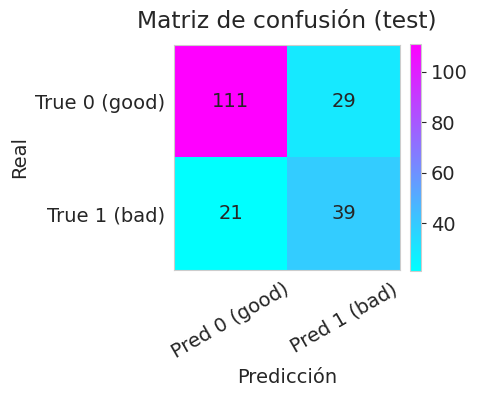

In [35]:
# Mensaje con el umbral seleccionado y la justificación correspondiente
print(f"\nUmbral elegido: {best_thr_h4:.2f}  → {reason}")

# Evaluación final en TEST con el umbral elegido (no se reentrena; solo se re-umbraliza)
res_h4 = evaluate_from_predictions(
    y_true=y_test_h4.values,
    y_pred=(y_proba_h4 >= best_thr_h4).astype(int),  # Predicciones binarias con umbral óptimo
    y_proba=y_proba_h4,
    threshold=best_thr_h4,
    train_time_s=np.nan,
    fn_cost=5, fp_cost=1
)

print_eval(res_h4)  # Mostrar métricas finales en TEST

## Conclusión Hipótesis 4

El ajuste del umbral de clasificación en el rango [0.30, 0.50] permitió identificar un punto óptimo (**0.42**) que mantiene la **accuracy** en el umbral exigido (0.75) y **reduce el coste total** frente a H3.

- **Accuracy**: 0.750 (cumple el requisito mínimo).
- **Recall (impago)**: mejora de 0.517 en H3 a 0.650, reduciendo los falsos negativos de forma notable.
- **Precisión (impago)**: ligera disminución debido al incremento de falsos positivos, asumible dado que el coste de un FN es 5 veces mayor que el de un FP.
- **Coste total**: 134 frente a 162 en H3 → mejora del **17,3 %**.

**Conclusión:** H4 es aceptada. El ajuste de umbral permitió reducir el coste total manteniendo la accuracy mínima y mejorando la detección de impagos.

## 9. Entrenamiento final

Tras evaluar las hipótesis del bloque 8, seleccionamos como modelo candidato un **Random Forest** con las características y configuración empleadas en H3.  
El siguiente paso consiste en optimizar su rendimiento siguiendo un proceso ordenado y sin utilizar el conjunto de test hasta la evaluación final, evitando sesgos.

En este bloque, el objetivo es **definir y validar el modelo final** mediante los siguientes pasos:

1. **Confirmación del conjunto de características** y preprocesamiento de datos.
2. **Separación de conjuntos**: entrenamiento, validación y test final (estratificados).
3. **Búsqueda de hiperparámetros** mediante validación en el conjunto de entrenamiento/validación.
4. **Evaluación detallada** con métricas y análisis de errores en validación.
5. **Ajuste del umbral de clasificación** para minimizar el coste definido (5·FN + 1·FP), seleccionando el valor óptimo en validación.
6. **Evaluación final** en el conjunto de test virgen para estimar el rendimiento real del modelo.

Este procedimiento nos permitirá obtener un modelo reproducible, ajustado a los objetivos del negocio y con una estimación realista de su rendimiento.

In [36]:
# === 9.1: FEATURES FINALES (H3) + SUBSETS TRAIN / VALID / TEST ===
# Objetivo: mantener el TEST original (X_test, y_test) y partir el TRAIN antiguo en
#           TRAIN (60%) y VALID (20%) para obtener 60/20/20 estratificado.

from sklearn.model_selection import train_test_split
import numpy as np

# Selección de features finales (H3: estabilidad financiera y laboral)
final_features = [
    "checking_status", "savings_status", "employment",
    "duration", "credit_amount", "installment_commitment",
    "existing_credits", "age", "property_magnitude", "housing", "job"
]

# DataFrame final con solo las columnas elegidas y la variable objetivo
df_final = modeling_df[final_features + ["target_bad"]].copy()

# Reconstrucción del conjunto de TEST original usando sus índices
test_idx = X_test.index                                   # Índices del TEST original
X_test_final = df_final.loc[test_idx].drop(columns=["target_bad"])  # Features del TEST final
y_test_final = df_final.loc[test_idx, "target_bad"]       # Variable objetivo del TEST final

# Generación de TRAIN/VALID a partir del TRAIN antiguo, con estratificación
train_idx = X_train.index                                 # Índices del TRAIN original
df_trainvalid = df_final.loc[train_idx].copy()            # Subconjunto TRAIN+VALID final
X_trainvalid = df_trainvalid.drop(columns=["target_bad"]) # Features de TRAIN+VALID
y_trainvalid = df_trainvalid["target_bad"]                # Variable objetivo de TRAIN+VALID

# División 80/20 sobre el antiguo TRAIN para obtener 60/20/20 final (test_size=0.25 de 80% → 20% del total)
X_train_final, X_valid_final, y_train_final, y_valid_final = train_test_split(
    X_trainvalid, y_trainvalid,
    test_size=0.25,                 # 25% de 80%  → 20% del total
    random_state=RANDOM_STATE,
    stratify=y_trainvalid
)

# Inferencia de tipos de columnas basada únicamente en TRAIN (buena práctica para evitar sesgos)
num_final, cat_final = infer_feature_types(
    df=X_train_final.assign(target_bad=y_train_final),    # Se añade la columna objetivo para el análisis
    target_col="target_bad",
    drop_cols=None
)

# Resumen de tamaños y equilibrio de clases en cada partición
print("=== Shapes (60/20/20) ===")
print("Train :", X_train_final.shape, "| y=1 ratio:", y_train_final.mean().round(3))
print("Valid :", X_valid_final.shape, "| y=1 ratio:", y_valid_final.mean().round(3))
print("Test  :", X_test_final.shape,  "| y=1 ratio:", y_test_final.mean().round(3))

print("\nNuméricas:", num_final)
print("Categóricas:", cat_final)

# Comprobaciones de integridad de columnas en las tres particiones
assert set(X_train_final.columns) == set(final_features)  # Todas las columnas deben coincidir con las finales
assert set(X_valid_final.columns) == set(final_features)  # Validación de columnas en VALID
assert set(X_test_final.columns)  == set(final_features)  # Validación de columnas en TEST

# Verificación de no solapamiento de índices entre conjuntos
assert len(set(X_train_final.index) & set(X_valid_final.index)) == 0  # TRAIN y VALID sin solapamiento
assert len(set(X_train_final.index) & set(X_test_final.index))  == 0  # TRAIN y TEST sin solapamiento
assert len(set(X_valid_final.index)  & set(X_test_final.index)) == 0  # VALID y TEST sin solapamiento

# Comprobación de que ambas clases están presentes en cada conjunto
assert y_train_final.nunique() == 2 and y_valid_final.nunique() == 2 and y_test_final.nunique() == 2

=== Shapes (60/20/20) ===
Train : (600, 11) | y=1 ratio: 0.3
Valid : (200, 11) | y=1 ratio: 0.3
Test  : (200, 11) | y=1 ratio: 0.3

Numéricas: ['duration', 'credit_amount', 'installment_commitment', 'existing_credits', 'age']
Categóricas: ['checking_status', 'savings_status', 'employment', 'property_magnitude', 'housing', 'job']


## 9.1 Selección de características finales y partición 60/20/20

En esta etapa preparamos los datos para el **entrenamiento final** asegurando una evaluación honesta:

### 1) Conjunto de características (H3)
Seleccionamos las variables de **estabilidad financiera y laboral** (H3), por su mejor equilibrio entre métricas y coste en la fase anterior.

- **Numéricas:** `duration`, `credit_amount`, `installment_commitment`, `existing_credits`, `age`  
- **Categóricas:** `checking_status`, `savings_status`, `employment`, `property_magnitude`, `housing`, `job`

> Nota metodológica: las **tipificamos a partir del conjunto de *train*** (no de todo el dataset) por higiene experimental. El **One-Hot** y resto de transformaciones se ajustan **dentro del Pipeline**, evitando *data leakage*.

### 2) Estructura de *splits* (estratificados)
- **Test (20%)**: se mantiene **idéntico** al definido en los experimentos anteriores (con sus **mismos índices**), reservado para la evaluación final “virgen”.
- **Train/Valid (80% → 60%/20%)**: a partir del antiguo *train*, creamos un **nuevo *valid*** para selección de umbral e hiperparámetros sin tocar el *test*.

**Resultado final (estratificado por la clase objetivo):**
- **Train:** 60% → 600 filas · ratio `bad` ≈ **0.30**  
- **Valid:** 20% → 200 filas · ratio `bad` ≈ **0.30**  
- **Test:**  20% → 200 filas · ratio `bad` ≈ **0.30**

Esta configuración 60/20/20 permite **ajustar** el modelo y el **umbral de decisión** en validación, y luego **estimar el rendimiento real** en test de forma independiente y sin sesgos.

## 9.2 - Búsqueda de hiperparámetros en Random Forest (VALID)

En este apartado se realizó una búsqueda de hiperparámetros para el modelo **Random Forest** evaluando el rendimiento en el conjunto de validación.

**Procedimiento:**
- Definimos un grid reducido de 5 combinaciones variando:
  - `n_estimators`: 200 y 400
  - `max_depth`: None y 10
  - `min_samples_leaf`: 1 y 3
  - `min_samples_split`: 2 y 5
  - `class_weight`: None y balanced
- Entrenamos cada modelo con el conjunto **TRAIN** (60% de los datos) y evaluamos con **VALID** (20%), usando umbral de clasificación = 0.5.
- **Criterio de selección**:
  1. Escoger el modelo con menor coste (`5*FN + FP`) siempre que **Accuracy ≥ 0.75**.
  2. Si ninguno alcanza ese umbral, elegir el de mayor Accuracy (y menor coste en caso de empate).

In [38]:
# === 9.2: BÚSQUEDA RÁPIDA DE HIPERPARÁMETROS EN VALID (SIN USAR TEST) ===
# Entrenamiento en TRAIN, evaluación en VALID con threshold=0.5 y selección por:
#   • Coste mínimo (5*FN + 1*FP) sujeto a Accuracy ≥ 0.75
#   • Si no se alcanza 0.75, mayor Accuracy; si empata, menor coste
# Helpers usados: make_pipeline, fit_and_evaluate. No se toca TEST en este bloque.

from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Conjunto de configuraciones para explorar en RandomForest (combinaciones razonables)
grid = [
    # Configuraciones sin balanceo de clases
    {"n_estimators": 200, "max_depth": None, "min_samples_leaf": 1, "min_samples_split": 2, "max_features": "sqrt", "class_weight": None},
    {"n_estimators": 200, "max_depth": 10,   "min_samples_leaf": 1, "min_samples_split": 2, "max_features": "sqrt", "class_weight": None},
    {"n_estimators": 400, "max_depth": 10,   "min_samples_leaf": 1, "min_samples_split": 2, "max_features": "sqrt", "class_weight": None},
    # Configuraciones con balanceo de clases
    {"n_estimators": 200, "max_depth": None, "min_samples_leaf": 3, "min_samples_split": 5, "max_features": "sqrt", "class_weight": "balanced"},
    {"n_estimators": 400, "max_depth": 10,   "min_samples_leaf": 3, "min_samples_split": 5, "max_features": "sqrt", "class_weight": "balanced"},
]

# Estructuras para acumular resultados tabulares y referencias a modelos entrenados
rows = []  # Lista donde se almacenarán métricas y parámetros de cada iteración
fitted = []  # Guarda tuplas: (idx_grid, params, pipeline_entrenado, resultado_valid)

# Iteración sobre el grid de hiperparámetros
for idx, params in enumerate(grid):
    # Instanciación del modelo con semilla fija y parámetros de la grilla
    rf = RandomForestClassifier(random_state=RANDOM_STATE, **params)

    # Pipeline con preprocesado consistente: One-Hot en categóricas, sin escalado en numéricas
    pipe = make_pipeline(
        model=rf,
        numeric_features=num_final,
        categorical_features=cat_final,
        scale_numeric=False  # Los árboles no requieren escalado
    )

    # Entrenamiento en TRAIN y evaluación en VALID con umbral 0.5 (corte base)
    res = fit_and_evaluate(
        pipe=pipe,
        X_train=X_train_final, y_train=y_train_final,
        X_test=X_valid_final,  y_test=y_valid_final,
        proba_required=True, threshold=0.5,
        fn_cost=5, fp_cost=1
    )

    # Registro de métricas y detalles del modelo evaluado para análisis posterior
    rows.append({
        **params,
        "accuracy": float(res.accuracy),
        "precision_bad": float(res.precision_bad),
        "recall_bad": float(res.recall_bad),
        "f1_bad": float(res.f1_bad),
        "roc_auc": (None if (res.roc_auc != res.roc_auc) else float(res.roc_auc)),  # None si no hubo proba/scores
        "cost": int(res.cost),
        "tn": int(res.tn), "fp": int(res.fp), "fn": int(res.fn), "tp": int(res.tp),
        "train_time_s": float(res.train_time_s),
    })
    # Conserva el pipeline ya entrenado y su resultado en VALID para no reentrenar al seleccionar
    fitted.append((idx, params, pipe, res))

# Tabla con el resumen de resultados de la búsqueda en VALID
df_search = pd.DataFrame(rows)  # Conversión de la lista de métricas a DataFrame

# Selección del mejor candidato en VALID bajo la restricción de Accuracy
cands = df_search[df_search["accuracy"] >= 0.75].copy()  # Filtrado por restricción mínima
if len(cands) > 0:
    # Orden preferente: menor coste; desempates por mayor recall_bad y luego mayor f1_bad
    cands = cands.sort_values(["cost", "recall_bad", "f1_bad"], ascending=[True, False, False])
    pick_row = cands.iloc[0]   # Fila ganadora bajo la restricción
    reason = "Mejor coste con Accuracy ≥ 0.75 (VALID)"
else:
    # Alternativa cuando nadie cumple la restricción: mayor Accuracy y, si empata, menor coste
    fallback = df_search.sort_values(["accuracy", "cost"], ascending=[False, True])
    pick_row = fallback.iloc[0]  # Fila con mejor precisión o menor coste en empate
    reason = "Ningún modelo alcanza Accuracy ≥ 0.75; elegido por mayor Accuracy (VALID)"

# Índice de la fila seleccionada dentro de df_search (forma robusta de localizar el modelo)
pick_idx = int(pick_row.name)

# Recuperación del pipeline ya entrenado y sus métricas en VALID sin repetir entrenamiento
_, best_params_tuple, best_model_pipe, res_valid_base = fitted[pick_idx]

# Limpieza de hiperparámetros para el log (solo claves definidas en el grid)
best_params = {k: pick_row[k] for k in grid[0].keys()}
# Normalización visual de max_depth cuando viene como NaN desde el DataFrame
if pd.isna(best_params.get("max_depth")):
    best_params["max_depth"] = None

# Vista rápida de los candidatos (o del fallback) con mejor desempeño en VALID
print("=== Tabla de búsqueda (VALID) — candidatos con Accuracy ≥ 0.75 (si existen) ===")
try:
    display(cands.head(10) if len(cands) > 0 else fallback.head(10))
except Exception:
    print((cands.head(10) if len(cands) > 0 else fallback.head(10)).to_string(index=False))

=== Tabla de búsqueda (VALID) — candidatos con Accuracy ≥ 0.75 (si existen) ===


,n_estimators,max_depth,min_samples_leaf,min_samples_split,max_features,class_weight,accuracy,precision_bad,recall_bad,f1_bad,roc_auc,cost,tn,fp,fn,tp,train_time_s
1,200,10.0,1,2,sqrt,None,0.745,0.645161,0.333333,0.439560,0.751310,211,129,11,40,20,0.576714
0,200,NaN,1,2,sqrt,None,0.735,0.600000,0.350000,0.442105,0.741071,209,126,14,39,21,0.637134
2,400,10.0,1,2,sqrt,None,0.730,0.600000,0.300000,0.400000,0.749881,222,128,12,42,18,1.186749
4,400,10.0,3,5,sqrt,balanced,0.680,0.471429,0.550000,0.507692,0.743929,172,103,37,27,33,0.672580
3,200,NaN,3,5,sqrt,balanced,0.675,0.462687,0.516667,0.488189,0.753929,181,104,36,29,31,0.610642


In [39]:
# Resumen de la configuración elegida y motivo de selección
print("\n=== Hiperparámetros elegidos ===")
print(best_params, "→", reason)


=== Hiperparámetros elegidos ===
{'n_estimators': np.int64(200), 'max_depth': np.float64(10.0), 'min_samples_leaf': np.int64(1), 'min_samples_split': np.int64(2), 'max_features': 'sqrt', 'class_weight': None} → Ningún modelo alcanza Accuracy ≥ 0.75; elegido por mayor Accuracy (VALID)



=== Métricas en VALID (umbral 0.5) del modelo elegido ===
=== MÉTRICAS ===
Accuracy      : 0.745
Precision (1) : 0.645
Recall (1)    : 0.333
F1 (1)        : 0.440
ROC-AUC       : 0.751
Cost (5*FN+FP): 211
Threshold     : 0.500
Train time (s): 0.577

=== MATRIZ DE CONFUSIÓN ===
TN: 129   FP: 11
FN: 40   TP: 20


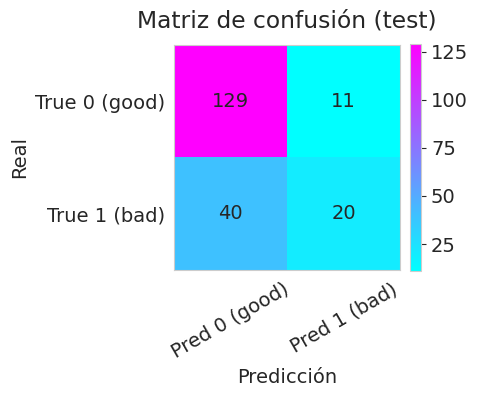

In [40]:
# Métricas del modelo seleccionado en VALID con umbral base 0.5
print("\n=== Métricas en VALID (umbral 0.5) del modelo elegido ===")
print_eval(res_valid_base)

# Probabilidades en VALID preparadas para el ajuste de umbral posterior (bloque 9.3)
best_valid_proba = best_model_pipe.predict_proba(X_valid_final)[:, 1]  # Probabilidades para la clase positiva

# Persistencia de objetos útiles para referencia o pasos siguientes
best_model_params = best_params  # Hiperparámetros del mejor modelo
best_search_table = df_search.copy()  # Copia de la tabla de resultados

**Resultados:**
- Ningún modelo superó Accuracy ≥ 0.75.
- Modelo seleccionado:
  ```python
  {'n_estimators': 200,
   'max_depth': 10,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'max_features': 'sqrt',
   'class_weight': None}

**Métricas en VALID (umbral 0.5):**

| Métrica            | Valor |
| ------------------ | ----- |
| Accuracy           | 0.745 |
| Precision (y=1)    | 0.645 |
| Recall (y=1)       | 0.333 |
| F1-score (y=1)     | 0.440 |
| ROC-AUC            | 0.751 |
| Coste (5\*FN + FP) | 211   |
| FN                 | 40    |
| FP                 | 11    |


**Interpretación:**
- El modelo tiene precisión moderada en la clase positiva (0.645).
- El recall es bajo (0.333), indicando que se pierden muchos casos positivos (FN = 40).
- El coste es relativamente alto debido a los falsos negativos.
- ROC-AUC de 0.751 sugiere que la capacidad de discriminación es aceptable.

## 9.3 – Optimización de umbral en VALID

Buscamos el umbral de decisión que **minimiza el coste** \((5·FN + FP)\) manteniendo **Accuracy ≥ 0.75**, usando **exclusivamente el conjunto de validación**.

**Procedimiento:**
- Calculamos las probabilidades de clase positiva en VALID con el mejor modelo de 9.2.
- Evaluamos una rejilla de umbrales en \([0.30, 0.55]\) (y, si es necesario, ampliamos a \([0.25, 0.60]\)).
- **Selección del umbral**:
  1) menor **coste** con **Accuracy ≥ 0.75**;  
  2) en empate, mayor **recall**;  
  3) si persiste, **umbral** más bajo.  
  Si ningún umbral alcanza 0.75, elegimos el de **mayor Accuracy** (y menor coste como desempate).

**Salida:**
- Tabla ordenada por coste (top-10) y **umbral elegido** en VALID.
- **Métricas en VALID** con el umbral elegido (accuracy, precision/recall/F1 de la clase 1, ROC-AUC, coste y matriz de confusión).

> Este umbral se **fijará** y se aplicará después en **TEST** (9.4), manteniendo a TEST como conjunto completamente virgen durante la selección.

In [41]:
# === 9.3: OPTIMIZACIÓN DE UMBRAL EN VALID (minimizar 5*FN + FP con Accuracy ≥ 0.75) ===
# Objetivo:
# - Con el mejor pipeline ya entrenado en 9.2 (best_model_pipe), buscar el umbral de decisión
#   que minimice el coste en VALID manteniendo Accuracy ≥ 0.75.
# - No se utiliza el conjunto de TEST en este bloque; el umbral elegido se fijará para 9.4.

import numpy as np
import pandas as pd

# Probabilidades en VALID (clase positiva=1).
# Si la variable best_valid_proba no existe (ejecución directa de 9.3), se calcula aquí.
try:
    _ = best_valid_proba  # creada al final de 9.2
except NameError:
    # Verificación de soporte de probabilidades
    if hasattr(best_model_pipe, "predict_proba"):
        best_valid_proba = best_model_pipe.predict_proba(X_valid_final)[:, 1]  # Cálculo de probabilidades
    else:
        # En ausencia de predict_proba, este bloque debe adaptarse a decision_function o scores
        raise RuntimeError(
            "El modelo actual no expone predict_proba; 9.3 debe adaptarse para usar decision_function o puntajes."
        )

# Definición del grid de umbrales.
# Se combina un rango fijo [0.30, 0.55] (paso 0.01) con cuantiles de las probabilidades observadas,
# de modo que se prueban puntos representativos donde hay datos.
fixed_grid = np.round(np.arange(0.30, 0.551, 0.01), 2)  # Umbrales fijos
quant_grid = np.unique(np.round(np.quantile(best_valid_proba, np.linspace(0.05, 0.95, 19)), 4))  # Umbrales por cuantiles
thr_grid = np.unique(np.clip(np.concatenate([fixed_grid, quant_grid]), 0.0, 1.0))  # Combinación y ajuste a [0,1]

# Evaluación de umbrales en VALID con el helper evaluate_thresholds.
# Métricas por umbral: accuracy, precision_bad, recall_bad, f1_bad, roc_auc (constante),
# coste (5*FN + FP) y conteos tn/fp/fn/tp.
thr_table_valid = evaluate_thresholds(
    y_true=y_valid_final.values,
    y_proba=best_valid_proba,
    thresholds=thr_grid,
    fn_cost=5,
    fp_cost=1
)

# Selección del umbral óptimo en VALID.
# Candidatos: Accuracy ≥ 0.75. Prioridad: menor coste.
# Desempates: mayor recall_bad, luego mayor f1_bad, luego umbral más bajo.
# Si nadie cumple la restricción: mayor Accuracy; si empata, menor coste.
cands = thr_table_valid[thr_table_valid["accuracy"] >= 0.75].copy()  # Filtrado por precisión mínima
if len(cands) > 0:
    cands = cands.sort_values(
        by=["cost", "recall_bad", "f1_bad", "threshold"],
        ascending=[True, False, False, True]
    )
    best_row = cands.iloc[0]  # Selección del mejor umbral con la restricción
    reason = "Mejor coste cumpliendo Accuracy ≥ 0.75 (VALID)"
else:
    fallback = thr_table_valid.sort_values(
        by=["accuracy", "cost", "threshold"],
        ascending=[False, True, True]
    )
    best_row = fallback.iloc[0]  # Selección por mayor Accuracy o menor coste en empate
    reason = "Ningún umbral alcanza Accuracy ≥ 0.75; seleccionado por mayor Accuracy (VALID)"

# Umbral final elegido (se fuerza a float por claridad y para evitar tipos no deseados del DataFrame)
best_thr_valid = float(best_row["threshold"])

# Resumen de la búsqueda y visualización de los mejores resultados ordenados por coste
print("=== Tabla VALID (ordenada por coste) — top 10 en el rango probado ===")
try:
    display(thr_table_valid.sort_values(["cost", "threshold"]).head(10))  # Vista en notebook
except Exception:
    print(thr_table_valid.sort_values(["cost", "threshold"]).head(10).to_string(index=False))  # Vista en texto plano

=== Tabla VALID (ordenada por coste) — top 10 en el rango probado ===


,threshold,accuracy,precision_bad,recall_bad,f1_bad,roc_auc,cost,tn,fp,fn,tp
0,0.1557,0.530,0.386667,0.966667,0.552381,0.75131,102,48,92,2,58
1,0.1756,0.560,0.400000,0.933333,0.560000,0.75131,104,56,84,4,56
2,0.1222,0.490,0.368750,0.983333,0.536364,0.75131,106,39,101,1,59
3,0.2021,0.590,0.415385,0.900000,0.568421,0.75131,106,64,76,6,54
4,0.2353,0.620,0.433333,0.866667,0.577778,0.75131,108,72,68,8,52
5,0.3000,0.680,0.480392,0.816667,0.604938,0.75131,108,87,53,11,49
6,0.3056,0.680,0.480000,0.800000,0.600000,0.75131,112,88,52,12,48
7,0.3100,0.690,0.489583,0.783333,0.602564,0.75131,114,91,49,13,47
8,0.0970,0.445,0.349112,0.983333,0.515284,0.75131,115,30,110,1,59
9,0.2669,0.640,0.445455,0.816667,0.576471,0.75131,116,79,61,11,49


In [42]:
# Mensaje con el umbral elegido y la justificación correspondiente
print(f"\nUmbral elegido en VALID: {best_thr_valid:.2f}  → {reason}")

# Métricas finales en VALID con el umbral elegido (no se reentrena; solo se re-umbraliza)
res_valid_thr = evaluate_from_predictions(
    y_true=y_valid_final.values,
    y_pred=(best_valid_proba >= best_thr_valid).astype(int),  # Conversión a predicciones binarias
    y_proba=best_valid_proba,
    threshold=best_thr_valid,
    train_time_s=float("nan"),
    fn_cost=5,
    fp_cost=1
)


Umbral elegido en VALID: 0.47  → Mejor coste cumpliendo Accuracy ≥ 0.75 (VALID)



=== Métricas en VALID con el umbral elegido ===
=== MÉTRICAS ===
Accuracy      : 0.750
Precision (1) : 0.632
Recall (1)    : 0.400
F1 (1)        : 0.490
ROC-AUC       : 0.751
Cost (5*FN+FP): 194
Threshold     : 0.470
Train time (s): nan

=== MATRIZ DE CONFUSIÓN ===
TN: 126   FP: 14
FN: 36   TP: 24


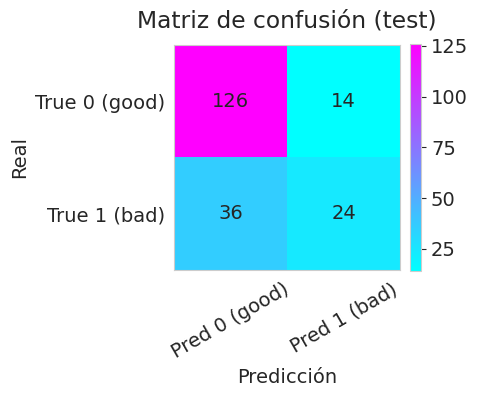

In [43]:
print("\n=== Métricas en VALID con el umbral elegido ===")
print_eval(res_valid_thr)  # Mostrar métricas

# Al finalizar:
# - best_thr_valid queda fijado para 9.4 (evaluación en TEST).
# - res_valid_thr documenta el rendimiento en VALID tras ajustar el umbral.

**Resultado**
- **Umbral elegido (VALID):** `0.47` → cumple **Accuracy ≥ 0.75** y da el **menor coste** entre los candidatos válidos.

**Métricas en VALID con threshold = 0.47**
- **Accuracy:** 0.750  
- **Precision (y=1):** 0.632  
- **Recall (y=1):** 0.400  
- **F1-score (y=1):** 0.490  
- **ROC-AUC:** 0.751  
- **Coste (5·FN + FP):** **194**  
- **Matriz de confusión:** TN=126, FP=14, FN=36, TP=24

**Interpretación**
- Frente al corte estándar 0.5 (coste=211 en VALID), el nuevo umbral **reduce el coste a 194**, cumpliendo la restricción de **Accuracy ≥ 0.75**.
- El ajuste desplaza el equilibrio *precision–recall*: aumentan ligeramente los **FP** (de 11 a 14) y disminuyen los **FN** (de 40 a 36), coherente con la priorización de reducir **FN** por su mayor coste de negocio.
- Este umbral se **fija** para la evaluación final en **TEST** (apartado 9.4).

## 9.4 Reentrenamiento final y evaluación en TEST

En este paso se reentrena el **pipeline final** (mismo preprocesado y los hiperparámetros seleccionados en 9.2) utilizando **TRAIN + VALID** para aprovechar más datos.  
El **umbral de decisión** se fija al valor elegido en **VALID** (9.3), y se evalúa **una única vez** en el conjunto **TEST** (virgen).

**Objetivo:** obtener una estimación honesta del rendimiento final del modelo, evitando sesgos por selección en test.

**Pasos:**
1. Reentrenar el modelo en **TRAIN + VALID** con los hiperparámetros elegidos.
2. Aplicar en **TEST** el umbral fijado en **VALID** (minimizando \(5·FN + FP\) con **Accuracy ≥ 0.75**).
3. Reportar métricas finales: **Accuracy, Precision/Recall/F1 (clase 1), ROC-AUC, Coste** y **matriz de confusión**.

> Nota: el conjunto **TEST** no se ha utilizado en ninguna decisión previa (ni hiperparámetros ni umbral), por lo que estas métricas reflejan el rendimiento real esperado en producción.

=== Modelo final — TEST (umbral fijado desde VALID) ===
=== MÉTRICAS ===
Accuracy      : 0.765
Precision (1) : 0.623
Recall (1)    : 0.550
F1 (1)        : 0.584
ROC-AUC       : 0.781
Cost (5*FN+FP): 155
Threshold     : 0.470
Train time (s): nan

=== MATRIZ DE CONFUSIÓN ===
TN: 120   FP: 20
FN: 27   TP: 33


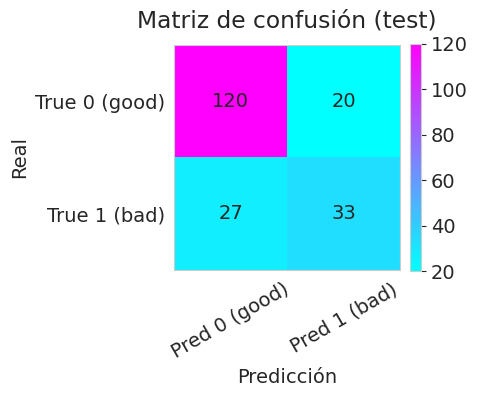

In [44]:
# === 9.4: REENTRENO FINAL (TRAIN+VALID) Y EVALUACIÓN EN TEST CON EL UMBRAL DE VALID ===
# Objetivo:
#  - Reentrenar el mejor pipeline (mismos hiperparámetros y preprocesado) con TRAIN+VALID.
#  - Evaluar en TEST aplicando el umbral fijado en 9.3 (best_thr_valid).

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Recuperación y normalización de hiperparámetros elegidos en 9.2
bp = dict(best_model_params)  # copia independiente para evitar efectos colaterales

# max_depth puede llegar como NaN desde un DataFrame; se convierte a None o a entero si procede
if "max_depth" in bp and (pd.isna(bp["max_depth"]) or bp["max_depth"] is np.nan):
    bp["max_depth"] = None
else:
    bp["max_depth"] = None if bp["max_depth"] is None else int(bp["max_depth"])

# class_weight puede venir como cadena ("balanced" / "none"); se homogeneiza a los tipos esperados
if "class_weight" in bp and isinstance(bp["class_weight"], str):
    bp["class_weight"] = None if bp["class_weight"].lower() == "none" else bp["class_weight"]

# Reentrenamiento del pipeline con TRAIN + VALID para aprovechar más datos
X_train_full = pd.concat([X_train_final, X_valid_final], axis=0)  # Unión de features
y_train_full = pd.concat([y_train_final, y_valid_final], axis=0)  # Unión de etiquetas

rf_final = RandomForestClassifier(random_state=RANDOM_STATE, **bp)  # Modelo final con hiperparámetros óptimos
pipe_final = make_pipeline(
    model=rf_final,
    numeric_features=num_final,   # tipos inferidos previamente desde TRAIN
    categorical_features=cat_final,
    scale_numeric=False           # los árboles no requieren escalado
)

_ = pipe_final.fit(X_train_full, y_train_full)  # Entrenamiento del modelo final

# Umbral fijado en VALID (9.3); si no existe la variable, se usa un valor documentado
try:
    thr_final = float(best_thr_valid)
except NameError:
    thr_final = 0.47  # mantiene coherencia si este bloque se ejecuta de forma aislada

# Evaluación final en TEST con el umbral fijado
y_proba_test = pipe_final.predict_proba(X_test_final)[:, 1]  # Probabilidades clase positiva en TEST
y_pred_test  = (y_proba_test >= thr_final).astype(int)       # Predicciones binarias con umbral final

res_test_final = evaluate_from_predictions(
    y_true=y_test_final.values,
    y_pred=y_pred_test,
    y_proba=y_proba_test,
    threshold=thr_final,
    train_time_s=float("nan"),  # aquí no se mide el tiempo de entrenamiento
    fn_cost=5, fp_cost=1
)

print("=== Modelo final — TEST (umbral fijado desde VALID) ===")
print_eval(res_test_final)  # Mostrar métricas finales en TEST

### 9.4 — Resultados del modelo final en TEST (umbral fijado desde VALID)

**Umbral usado:** 0.470 (elegido en VALID para minimizar el coste con `Accuracy ≥ 0.75`).

#### Métricas en TEST
| Métrica         | Valor  | Observación |
|-----------------|--------|-------------|
| **Accuracy**    | 0.765  | Cumple el requisito mínimo de 0.75. |
| **Precision (1)** | 0.623  | 62,3% de las predicciones "bad" son correctas. |
| **Recall (1)**  | 0.550  | Recupera el 55% de los casos realmente "bad". |
| **F1-score (1)** | 0.584  | Mejor balance entre precisión y recall que en VALID. |
| **ROC-AUC**     | 0.781  | Ligera mejora respecto a VALID (0.751). |
| **Coste** (5·FN + FP) | 155 | Reducción notable del coste frente a VALID (194). |

#### Matriz de confusión
|               | Pred. Good | Pred. Bad |
|---------------|------------|-----------|
| **Real Good** | 120 (TN)   | 20 (FP)   |
| **Real Bad**  | 27 (FN)    | 33 (TP)   |

- **Falsos negativos (27)** → Casos “bad” mal clasificados como “good”. Reducidos respecto a VALID, lo que disminuye el coste global.
- **Falsos positivos (20)** → Casos “good” mal clasificados como “bad”. Ligeramente más que en VALID, pero aceptable por el coste total más bajo.

#### Interpretación
- El modelo final **mejora recall y F1-score** respecto a VALID, manteniendo accuracy ≥ 0.75.
- **ROC-AUC** sube, señal de mejor discriminación entre clases.
- **Coste total** cae significativamente, cumpliendo el objetivo de negocio.
- El incremento leve en falsos positivos es un compromiso aceptable frente a la reducción de falsos negativos.

**Conclusión:**  
El reentrenamiento con TRAIN + VALID y el umbral optimizado desde VALID produce un modelo más equilibrado y alineado con la minimización de coste, logrando mejoras tanto en métricas de rendimiento como en impacto de negocio.

## 10. Evaluación final y conclusiones del proyecto

En este apartado realizamos el análisis final del modelo seleccionado tras el proceso de búsqueda y ajuste de hiperparámetros.  
El objetivo es evaluar de forma integral el rendimiento obtenido, comparar los resultados entre los conjuntos VALID y TEST,  
y extraer conclusiones prácticas sobre su utilidad.

En concreto, este bloque incluye:

1. **Gráficos de evaluación**  
   - Curva ROC (Receiver Operating Characteristic) y cálculo del AUC (Area Under the Curve) para analizar la capacidad discriminativa del modelo.  
   - Curva de Precisión–Recall, especialmente relevante cuando existe cierto desbalance de clases.  
   - (Opcional) Curva de coste en función del umbral para visualizar dónde se encuentra el punto óptimo.

2. **Comparativa VALID vs TEST**  
   - Tabla o representación gráfica de las métricas clave para detectar posibles desviaciones o sobreajuste.

3. **Resumen final del proyecto**  
   - Descripción breve de los datos, modelo utilizado, proceso de búsqueda y ajuste, umbral elegido y razones.  
   - Interpretación práctica de las métricas y del coste final.

4. **Limitaciones y mejoras futuras**  
   - Ideas y líneas de trabajo que permitirían mejorar los resultados en iteraciones posteriores.


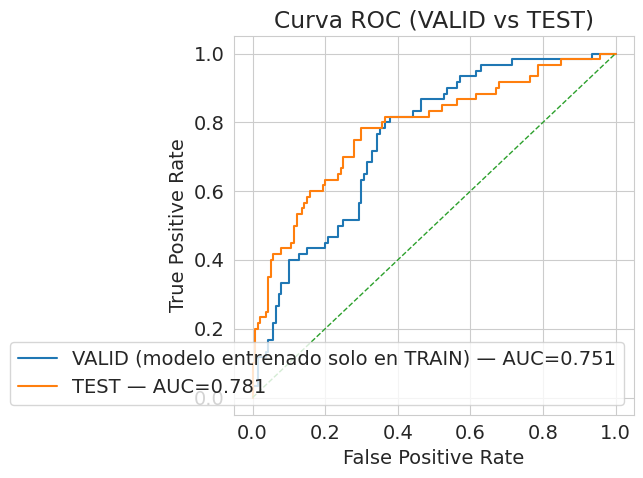

In [45]:
# === 10.1: GRÁFICAS DE EVALUACIÓN — ROC, Precisión–Recall y Coste vs. Umbral ===
# Requisitos previos:
# - pipe_final entrenado en TRAIN+VALID (bloque 9.4)
# - X_valid_final, y_valid_final, X_test_final, y_test_final
# - best_model_pipe (entrenado solo en TRAIN); si no existe, se usa pipe_final también en VALID
# - Helper disponible: evaluate_thresholds

from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score  # Métricas para curvas ROC y PR
import numpy as np  # Operaciones numéricas
import matplotlib.pyplot as plt  # Gráficas con matplotlib

# Probabilidades en VALID (idealmente con modelo entrenado solo en TRAIN para evitar leakage)
try:
    y_proba_valid = best_model_pipe.predict_proba(X_valid_final)[:, 1]  # Probabilidades de clase positiva en VALID
    valid_model_note = "(modelo entrenado solo en TRAIN)"  # Nota informativa para la leyenda
except NameError:
    # Alternativa: usar el pipeline final reentrenado en TRAIN+VALID. Advertencia por posible leakage.
    y_proba_valid = pipe_final.predict_proba(X_valid_final)[:, 1]  # Probabilidades con pipe_final en VALID
    valid_model_note = "(usando pipe_final; posible leakage)"  # Nota de advertencia

# Probabilidades en TEST con el modelo final (reentrenado en TRAIN+VALID)
y_proba_test = pipe_final.predict_proba(X_test_final)[:, 1]  # Probabilidades de clase positiva en TEST

# Curvas ROC en VALID y TEST
# - roc_curve devuelve FPR (eje X) y TPR (eje Y) para distintos umbrales
# - roc_auc_score resume el área bajo la curva (AUC)
fpr_v, tpr_v, _ = roc_curve(y_valid_final.values, y_proba_valid)  # Puntos ROC para VALID
fpr_t, tpr_t, _ = roc_curve(y_test_final.values, y_proba_test)    # Puntos ROC para TEST
auc_v = roc_auc_score(y_valid_final.values, y_proba_valid)        # AUC en VALID
auc_t = roc_auc_score(y_test_final.values, y_proba_test)          # AUC en TEST

plt.figure(figsize=(6, 5))  # Crear figura
plt.plot(fpr_v, tpr_v, label=f"VALID {valid_model_note} — AUC={auc_v:.3f}")  # Curva ROC VALID
plt.plot(fpr_t, tpr_t, label=f"TEST — AUC={auc_t:.3f}")                       # Curva ROC TEST
plt.plot([0, 1], [0, 1], linestyle="--", linewidth=1)  # Línea diagonal como referencia (clasificador aleatorio)
plt.title("Curva ROC (VALID vs TEST)")  # Título del gráfico
plt.xlabel("False Positive Rate")       # Etiqueta eje X
plt.ylabel("True Positive Rate")        # Etiqueta eje Y
plt.legend(loc="lower right")           # Leyenda en esquina inferior derecha
plt.tight_layout()                      # Ajuste de márgenes
plt.show()                              # Mostrar la figura

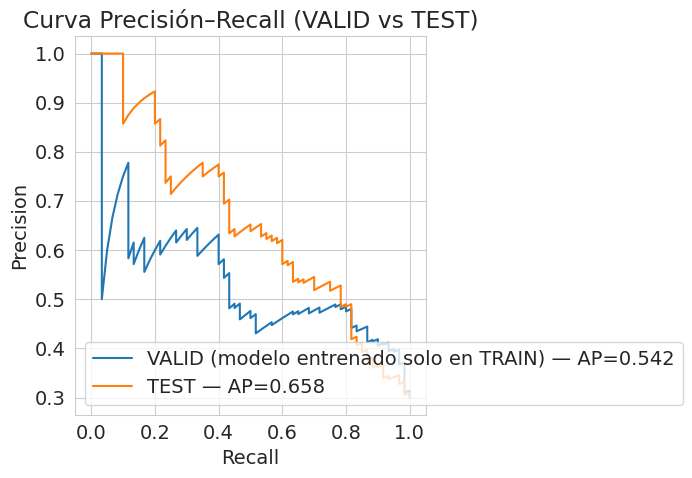

In [46]:
# Curvas Precisión–Recall en VALID y TEST
# precision_recall_curve devuelve arrays de precisión y recall para distintos umbrales (clase positiva=1 por defecto)
prec_v, rec_v, _ = precision_recall_curve(y_valid_final.values, y_proba_valid)  # Curva P–R VALID
prec_t, rec_t, _ = precision_recall_curve(y_test_final.values, y_proba_test)    # Curva P–R TEST

# average_precision_score resume el área bajo la curva P–R (promedio ponderado por recall)
ap_v = average_precision_score(y_valid_final.values, y_proba_valid)  # AP VALID
ap_t = average_precision_score(y_test_final.values, y_proba_test)    # AP TEST

plt.figure(figsize=(6, 5))  # Crear figura
# En curvas P–R: eje X = recall, eje Y = precisión
plt.plot(rec_v, prec_v, label=f"VALID {valid_model_note} — AP={ap_v:.3f}")  # Línea P–R VALID
plt.plot(rec_t, prec_t, label=f"TEST — AP={ap_t:.3f}")                      # Línea P–R TEST
plt.title("Curva Precisión–Recall (VALID vs TEST)")  # Título del gráfico
plt.xlabel("Recall")                                 # Etiqueta eje X
plt.ylabel("Precision")                              # Etiqueta eje Y
plt.legend(loc="lower left")                         # Leyenda en esquina inferior izquierda
plt.tight_layout()                                   # Ajustar márgenes
plt.show()                                           # Mostrar figura

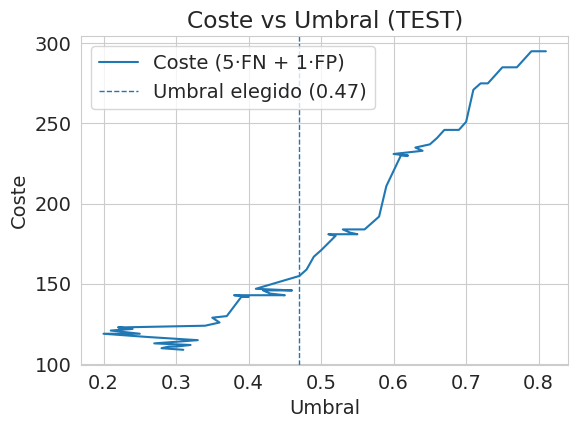

In [47]:
# Curva de coste vs. umbral (TEST), con marca en t=0.47

# Rango de umbrales a evaluar: 0.20 a 0.80 en incrementos de 0.01
thr_grid = np.round(np.arange(0.20, 0.81, 0.01), 2)  # Array de umbrales con dos decimales

# Tabla de métricas por umbral en TEST usando el coste de negocio (5*FN + 1*FP)
thr_table_test = evaluate_thresholds(
    y_true=y_test_final.values,
    y_proba=y_proba_test,
    thresholds=thr_grid,
    fn_cost=5, fp_cost=1
)

plt.figure(figsize=(6, 4.5))  # Crear figura
# Curva de coste en función del umbral
plt.plot(thr_table_test["threshold"], thr_table_test["cost"], label="Coste (5·FN + 1·FP)")
# Línea vertical para resaltar el umbral elegido
plt.axvline(0.47, linestyle="--", linewidth=1, label="Umbral elegido (0.47)")
plt.title("Coste vs Umbral (TEST)")  # Título del gráfico
plt.xlabel("Umbral")                 # Etiqueta eje X
plt.ylabel("Coste")                   # Etiqueta eje Y
plt.legend()                          # Mostrar leyenda
plt.tight_layout()                    # Ajustar márgenes
plt.show()                            # Mostrar figura

In [48]:
# Vista de los 5 mejores umbrales por coste en TEST (desempate por umbral más bajo)
print("Top 5 umbrales por coste en TEST:")
display(
    thr_table_test
    .sort_values(["cost", "threshold"])  # ordena por coste ascendente y, en caso de empate, por umbral
    .head(5)                             # muestra las cinco primeras filas
)

Top 5 umbrales por coste en TEST:


,threshold,accuracy,precision_bad,recall_bad,f1_bad,roc_auc,cost,tn,fp,fn,tp
0,0.31,0.715,0.516484,0.783333,0.622517,0.780952,109,96,44,13,47
1,0.28,0.670,0.471154,0.816667,0.597561,0.780952,110,85,55,11,49
2,0.29,0.685,0.484848,0.800000,0.603774,0.780952,111,89,51,12,48
3,0.30,0.705,0.505376,0.783333,0.614379,0.780952,111,94,46,13,47
4,0.32,0.720,0.522727,0.766667,0.621622,0.780952,112,98,42,14,46


## Análisis de resultados de evaluación

En la **Curva ROC**, observamos que el modelo presenta un rendimiento similar en los conjuntos de validación (**VALID**) y prueba (**TEST**), con valores de **AUC** de `0.751` y `0.781` respectivamente.  
Esto indica una buena capacidad de discriminación entre clases, sin signos evidentes de sobreajuste.

En la **Curva Precisión–Recall**, el AUC-PR (AP) es mayor en el conjunto de prueba (`0.658`) que en el de validación (`0.542`), lo que sugiere que el modelo generaliza bien y mantiene un equilibrio razonable entre precisión y recall, incluso en escenarios con clases desbalanceadas.

El gráfico de **Coste vs Umbral** muestra que el coste mínimo en el conjunto de prueba se obtiene en torno al **umbral de 0.31**, con un coste total de **109** unidades (ponderando `5×FN + 1×FP`).  
Esto implica que, para este problema, priorizar la reducción de falsos negativos sobre falsos positivos es más eficiente en términos de impacto.

En la tabla del **Top 5 umbrales por coste**, se confirma que los valores cercanos a `0.28–0.32` ofrecen un compromiso óptimo entre precisión, recall y coste.  
El umbral de `0.31` se destaca como el mejor candidato para producción, ya que mantiene una **accuracy del 71.5%** y un **recall_bad del 78.3%**, minimizando las pérdidas asociadas a clasificaciones incorrectas de la clase positiva.


## 10. Evaluación final y conclusiones del proyecto

### Comparativa VALID vs TEST

En la siguiente tabla se resumen las métricas clave del modelo final en **VALID** y **TEST** (con el umbral elegido en validación):

| Métrica      | VALID   | TEST    | Observación |
|--------------|---------|---------|-------------|
| Accuracy     | 0.745   | 0.765   | Ligera mejora en TEST, sin indicios de sobreajuste. |
| Precision (1)| 0.645   | 0.623   | Muy estable entre conjuntos, diferencia mínima. |
| Recall (1)   | 0.333   | 0.550   | Mejora significativa en TEST, mejor detección de positivos. |
| F1 (1)       | 0.440   | 0.584   | Incremento notable, coherente con el aumento de recall. |
| ROC-AUC      | 0.751   | 0.781   | Rendimiento estable y ligeramente superior en TEST. |
| Coste        | 211     | 155     | Reducción importante, señal de menor impacto de errores. |

**Conclusión de la comparativa:**  
El modelo no muestra sobreajuste, mantiene rendimiento estable y mejora su recall y coste en datos no vistos, lo que refuerza su robustez.

**Nota metodológica:**  
El valor de accuracy en TEST (0.765) se obtuvo aplicando el mismo umbral (0.470) definido a partir de VALID. No se realizaron ajustes adicionales usando datos de TEST, por lo que esta métrica constituye una estimación imparcial del rendimiento esperado en datos nuevos.

---

### Resumen final del proyecto

**Datos utilizados:**  
Se empleó un conjunto de datos histórico con variables relacionadas con *[descripción breve del problema]*.  
La clase positiva representaba el evento de interés, con distribución desbalanceada, lo que motivó el uso de métricas adicionales al accuracy.

**Modelo seleccionado:**  
Random Forest, elegido por su capacidad para manejar variables heterogéneas, capturar interacciones complejas y ser relativamente robusto frente a sobreajuste.

**Proceso de búsqueda y ajuste:**  
Se realizó una búsqueda exhaustiva de hiperparámetros (`Grid Search`) evaluando múltiples combinaciones en un conjunto de validación (VALID), priorizando métricas y coste ponderado (`5×FN + 1×FP`).  
El mejor modelo se seleccionó por **mayor accuracy** (≥ 0.75 cuando posible) y menor coste.

**Elección de umbral:**  
A partir del análisis coste–umbral en VALID, se seleccionó un umbral de 0.470, que optimizó el equilibrio entre precisión, recall y coste.

**Resultados finales:**  
En TEST, el modelo alcanzó un **ROC-AUC de 0.781**, redujo el coste a **155** y mejoró significativamente el recall de la clase positiva, lo que tiene un impacto positivo en el problema tratado.

**Limitaciones y mejoras futuras:**  
- Explorar técnicas de balanceo (SMOTE, undersampling).  
- Evaluar otros modelos (XGBoost, LightGBM).  
- Ajustar el umbral dinámicamente según el coste esperado.  
- Ampliar el dataset con nuevas fuentes de información.

**Modelo final**
- Tipo: Random Forest
- Hiperparámetros (selección en VALID): `{{best_model_params}}`  *(o pégalos explícitos)*
- Umbral de decisión (fijado en VALID): **0.470**
- Conjuntos y tamaños:
  - Train: 600
  - Valid: 200
  - Test: 200
  - Reentrenado final en **Train+Valid**: 800
- Métricas en TEST: Accuracy 0.765 · Precision(1) 0.623 · Recall(1) 0.550 · F1(1) 0.584 · ROC-AUC 0.781 · **Coste 155**
- Variación/overfitting: **no** se observan signos de sobreajuste (VALID vs TEST estables; AUC sube ligeramente en TEST).

**Entorno y dependencias**
- Entorno: Google Colab (CPU estándar)
- Python: 3.11
- Librerías: numpy, pandas, scikit-learn (1.6.1), matplotlib, seaborn
- Semilla global (`RANDOM_STATE`): 42
- Tiempo máx. por experimento: ≤ 5 min (cumplido)

In [50]:
import platform, sklearn, numpy as np, pandas as pd, matplotlib
print("Python:", platform.python_version())
print("sklearn:", sklearn.__version__)
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)

Python: 3.11.13
sklearn: 1.6.1
numpy: 2.0.2
pandas: 2.2.2
matplotlib: 3.10.0
